In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score

In [0]:
from numpy import *
def ackley_function(x):
    return -np.exp(-np.sqrt(0.5*np.sum([i**2 for i in x]))) - np.exp(0.5*np.sum([np.cos(i) for i in x])) + 1 + np.exp(1)


def bukin_function(x):
    return 100*sqrt(abs(x[1]-0.01*x[0]**2)) + 0.01*abs(x[0] + 10)


def cross_in_tray_function(x):
    return around(-0.0001*(abs(sin(x[0])*sin(x[1])*exp(abs(100 -
                            sqrt(sum([i**2 for i in x]))/pi))) + 1)**0.1, 7)


def sphere_function(x):
    return sum([i**2 for i in x])


def bohachevsky_function(x):
    return x[0]**2 + 2*x[1]**2 - 0.3*cos(3*pi*x[0]) - 0.4*cos(4*pi*x[1]) + 0.7


def sum_squares_function(x):
    return sum([(i+1)*x[i]**2 for i in range(len(x))])


def sum_of_different_powers_function(x):
    return sum([abs(x[i])**(i+2) for i in range(len(x))])


def booth_function(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2


def matyas_function(x):
    return 0.26*sphere_function(x) - 0.48*x[0]*x[1]


def mccormick_function(x):
    return sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5*x[0] + 2.5*x[1] + 1


def dixon_price_function(x):
    return (x[0] - 1)**2 + sum([(i+1)*(2*x[i]**2 - x[i-1])**2
                                for i in range(1, len(x))])


def six_hump_camel_function(x):
    return (4 - 2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1]\
           + (-4 + 4*x[1]**2)*x[1]**2


def three_hump_camel_function(x):
    return 2*x[0]**2 - 1.05*x[0]**4 + x[0]**6/6 + x[0]*x[1] + x[1]**2


def easom_function(x):
    return -cos(x[0])*cos(x[1])*exp(-(x[0] - pi)**2 - (x[1] - pi)**2)


def michalewicz_function(x):
    return -sum([sin(x[i])*sin((i+1)*x[i]**2/pi)**20 for i in range(len(x))])


def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + \
           (2.625 - x[0] + x[0]*x[1]**3)**2


def drop_wave_function(x):
    return -(1 + cos(12*sqrt(sphere_function(x))))/(0.5*sphere_function(x) + 2)
w = [ackley_function,bukin_function,
     cross_in_tray_function,sphere_function,
     bohachevsky_function,sum_squares_function,
     sum_of_different_powers_function,booth_function,matyas_function,
     mccormick_function,dixon_price_function,
     three_hump_camel_function,six_hump_camel_function,
    easom_function,michalewicz_function,beale_function]

In [0]:
import numpy as np
class KMeans:

    def __init__(
            self,
            n_cluster: int,
            init_pp: bool = True,
            max_iter: int = 300,
            tolerance: float = 1e-4,
            seed: int = None):
        
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.init_pp = init_pp
        self.seed = seed
        self.centroid = None
        self.mse = None

    def fit(self, data: np.ndarray):
        
        self.centroid = self._init_centroid(data)
        for _ in range(self.max_iter):
            distance = self._calc_distance(data)
            cluster = self._assign_cluster(distance)
            new_centroid = self._update_centroid(data, cluster)
            diff = np.abs(self.centroid - new_centroid).mean()
            self.centroid = new_centroid

            if diff <= self.tolerance:
                break

        self.mse = calc_mse(self.centroid, cluster, data)

    def predict(self, data: np.ndarray):

        distance = self._calc_distance(data)
        cluster = self._assign_cluster(distance)
        return cluster

    def _init_centroid(self, data: np.ndarray):
        
        if self.init_pp:
            np.random.seed(self.seed)
            centroid = [int(np.random.uniform()*len(data))]
            for _ in range(1, self.n_cluster):
                dist = []
                dist = [min([np.inner(data[c]-x, data[c]-x) for c in centroid])
                        for i, x in enumerate(data)]
                dist = np.array(dist)
                dist = dist / dist.sum()
                cumdist = np.cumsum(dist)

                prob = np.random.rand()
                for i, c in enumerate(cumdist):
                    if prob > c and i not in centroid:
                        centroid.append(i)
                        break
            centroid = np.array([data[c] for c in centroid])
        else:
            np.random.seed(self.seed)
            idx = np.random.choice(range(len(data)), size=(self.n_cluster))
            centroid = data[idx]
        return centroid

    def _calc_distance(self, data: np.ndarray):
        distances = []
        for c in self.centroid:
            distance = np.mean((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = distances.T
        return distances

    def _assign_cluster(self, distance: np.ndarray):
        cluster = np.argmin(distance, axis=1)
        return cluster

    def _update_centroid(self, data: np.ndarray, cluster: np.ndarray):
        centroids = []
        for i in range(self.n_cluster):
            idx = np.where(cluster == i)
            centroid = np.mean(data[idx], axis=0)
            centroids.append(centroid)
        centroids = np.array(centroids)
        return centroids


In [0]:
import numpy as np
from scipy.linalg import norm
from scipy.spatial.distance import cdist

class FCM:
    
    def __init__(self, n_clusters=10, max_iter=150, m=2, error=1e-5, random_state=0):
        assert m > 1
        self.u, self.centers = None, None
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error
        self.random_state = random_state

    def fit(self, X):
        
        self.n_samples = X.shape[0]
        r = np.random.RandomState(self.random_state)
        u = r.rand(self.n_samples, self.n_clusters)
        u = u / np.tile(u.sum(axis=1)[np.newaxis].T, self.n_clusters)

        r = np.random.RandomState(self.random_state)
        self.u = r.rand(self.n_samples,self.n_clusters)
        self.u = self.u / np.tile(self.u.sum(axis=1)[np.newaxis].T, self.n_clusters)

        for iteration in range(self.max_iter):
            u_old = self.u.copy()

            self.centers = self.next_centers(X)
            self.u = self._predict(X)

            if norm(self.u - u_old) < self.error:
                break


    def next_centers(self, X):
        
        um = self.u ** self.m
        return (X.T @ um / np.sum(um, axis=0)).T

    def _predict(self, X):
        
        power = float(2 / (self.m - 1))
        temp = cdist(X, self.centers) ** power
        denominator_ = temp.reshape((X.shape[0], 1, -1)).repeat(temp.shape[-1], axis=1)
        denominator_ = temp[:, :, np.newaxis] / denominator_

        return 1 / denominator_.sum(2)

    def predict(self, X):

        if len(X.shape) == 1:
            X = np.expand_dims(X, axis=0)

        u = self._predict(X)
        return np.argmax(u, axis=-1)

In [0]:
def quantization_error(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray) -> float:
    error = 0.0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.linalg.norm(data[idx] - c)
        dist /= len(idx)
        error += dist
    error /= len(centroids)
    return error

def calc_mse(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray):
    distances = []
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.mean((data[idx] - c)**2)
        distances.append(dist)
    return np.mean(distances)


class Particle:

    def __init__(self,
                 n_cluster: int,
                 data: np.ndarray,
                 use_kmeans: bool = False,
                 w: float = 0.9,
                 c1: float = 0.5,
                 c2: float = 0.5):
        index = np.random.choice(list(range(len(data))), n_cluster)
        self.centroids = data[index].copy()
        if use_kmeans:
            kmeans = KMeans(n_cluster=n_cluster, init_pp=False)
            kmeans.fit(data)
            self.centroids = kmeans.centroid.copy()
        self.best_position = self.centroids.copy()
        self.best_score = quantization_error(self.centroids, self._predict(data), data)
        self.best_mse = calc_mse(self.centroids, self._predict(data), data)
        self.velocity = np.zeros_like(self.centroids)
        self._w = w
        self._c1 = c1
        self._c2 = c2

    def update(self,gbest_position, data: np.ndarray):
        self._update_velocity(gbest_position)
        self._update_centroids(data)
        
    def update2(self,partice_pos,particles,function,gbest_position,data):
        gbest_position = self.new_gbest(partice_pos,particles,function,gbest_position)
        self._update_velocity(gbest_position)
        self._update_centroids(data)
            
    def new_gbest(self,partice_pos,particles,function,gbest_position):
        a = []
        fit = []
        prob = []
        fitness_a1 = function(partice_pos.centroids)
        for particle in particles:
            if np.mean(function(particle.centroids)) > np.mean(fitness_a1):
                a.append(particle)
                fit.append(function(particle.centroids))
        for value in fit:
            if np.mean(value)>=0:
                value = 1/(1+value)
                prob.append(value)
            else :
                value = 1+abs(value)
                prob.append(value)
        try:
            prob = prob / np.sum(prob,axis=0)
            prob = np.mean(prob,axis = 1)
            part = np.argmax(prob)
            v = particles[part].centroids
            return v
        
        except:
            return gbest_position
        
        
    def _update_velocity(self, gbest_position: np.ndarray):
        """Update velocity based on old value, cognitive component, and social component
        """

        v_old = self._w * self.velocity
        cognitive_component = self._c1 * np.random.random() * (self.best_position - self.centroids)
        social_component = self._c2 * np.random.random() * (gbest_position - self.centroids)
        self.velocity = v_old + cognitive_component + social_component

    def _update_centroids(self, data: np.ndarray):
        self.centroids = self.centroids + self.velocity
        new_score = quantization_error(self.centroids, self._predict(data), data)
        mse = calc_mse(self.centroids, self._predict(data), data)
        self.best_mse = min(mse, self.best_mse)
        if new_score < self.best_score:
            self.best_score = new_score
            self.best_position = self.centroids.copy()

    def _predict(self, data: np.ndarray) -> np.ndarray:
        """Predict new data's cluster using minimum distance to centroid
        """
        distance = self._calc_distance(data)
        cluster = self._assign_cluster(distance)
        return cluster

    def _calc_distance(self, data: np.ndarray) -> np.ndarray:
        """Calculate distance between data and centroids
        """
        distances = []
        for c in self.centroids:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = np.transpose(distances)
        return distances

    def _assign_cluster(self, distance: np.ndarray) -> np.ndarray:
        """Assign cluster to data based on minimum distance to centroids
        """
        cluster = np.argmin(distance, axis=1)
        return cluster


In [0]:
class CNParticleSwarmOptimizedClustering:
    def __init__(self,
                 n_cluster: int,
                 n_particles: int,
                 data: np.ndarray,
                 hybrid: bool = True,
                 max_iter: int = 100,
                 print_debug: int = 10,
                 function = dixon_price_function):
        self.function = function
        self.n_cluster = n_cluster
        self.n_particles = n_particles
        self.data = data
        self.max_iter = max_iter
        self.particles = []
        self.hybrid = hybrid

        self.print_debug = print_debug
        self.gbest_score = np.inf
        self.gbest_centroids = None
        self.gbest_mse = np.inf
        self._init_particles()

    def _init_particles(self):
        for i in range(self.n_particles):
            particle = None
            if i == 0 and self.hybrid:
                particle = Particle(self.n_cluster, self.data, use_kmeans=True)
            else:
                particle = Particle(self.n_cluster, self.data, use_kmeans=False)
            if particle.best_score < self.gbest_score:
                self.gbest_centroids = particle.centroids.copy()
                self.gbest_score = particle.best_score
            self.particles.append(particle)
            self.gbest_mse = min(particle.best_mse, self.gbest_mse)
    
    def run(self):
        print('Initial global best score', self.gbest_score)
        history = []
        for i in range(self.max_iter):
            for particle in self.particles:
                if (particle.centroids == self.gbest_centroids).all():
                    particle.update(self.gbest_centroids, self.data)
                # print(i, particle.best_score, self.gbest_score)
                else:
                    particles = self.particles
                    particle.update2(particle,particles,self.function,self.gbest_centroids, self.data)
            for particle in self.particles:
                if particle.best_score < self.gbest_score:
                    self.gbest_centroids = particle.centroids.copy()
                    self.gbest_score = particle.best_score
            history.append(self.gbest_score)
            if i % self.print_debug == 0:
                print('Iteration {:04d}/{:04d} current gbest score {:.18f}'.format(
                    i + 1, self.max_iter, self.gbest_score))
        print('Finish with gbest score {:.18f}'.format(self.gbest_score))
        return history
    
    def _calc_distance(self, data: np.ndarray):
        
        distances = []
        for c in self.centroid:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = distances.T
        return distances

    def predict(self, distance: np.ndarray):
        
        cluster = np.argmin(distance, axis=1)
        return cluster

In [0]:
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [0]:
df=pd.read_csv('/content/drive/My Drive/norm.csv')

In [0]:
df_req = df[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)','classs']]
X  = df_req[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)']]
labels = df.classs.values

In [0]:
pso = CNParticleSwarmOptimizedClustering(
        n_cluster=2, n_particles=10, data=X.values, max_iter=200, print_debug=50,hybrid = False)

In [12]:
import warnings
warnings.filterwarnings("ignore")
hist = pso.run()

Initial global best score 168.97383034041755
Iteration 0001/0200 current gbest score 161.143368696309153165
Iteration 0051/0200 current gbest score 156.278073922016119468
Iteration 0101/0200 current gbest score 156.278073922016119468
Iteration 0151/0200 current gbest score 156.278073922016119468
Finish with gbest score 156.278073922016119468


In [13]:
pso.gbest_centroids

array([[  0.92514251, 139.78783881,   0.66214466,   7.76773519],
       [  0.64564335,  88.47137702,   0.72838033,  12.80659434]])

In [14]:
dunn(pso.gbest_centroids)

0.00011860721787688717

In [15]:
pso.gbest_mse

97.76593125439832

In [0]:
c = pso.predict(X.values)

In [0]:
from sklearn.metrics.pairwise import euclidean_distances
def get_cls(c,x):
  cl0,cl1 = [],[]
  for i in range(len(c)):
    if c[i] == 0:
      cl0.append(x[i])
    if c[i] == 1:
      cl1.append(x[i])
  return cl0,cl1
def cluster_dist(cl0,cl1):
  d0 = euclidean_distances(cl0, cl1)
  d1 = euclidean_distances(cl1, cl0)
  A = euclidean_distances(cl0, cl0)
  C = euclidean_distances(cl1, cl1)
  d0 = np.mean(np.mean(d0,axis=1),axis=0)
  d1 = np.mean(np.mean(d1,axis=1),axis=0)
  a = np.mean(np.sum(A,axis=1)/(len(A)-1))
  c = np.mean(np.sum(C,axis=1)/(len(C)-1))
  return d0,a,c

In [0]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [22]:
purity_score(labels,c)

0.6153846153846154

In [21]:
import warnings
warnings.filterwarnings("ignore")
for i in w:
    print('<-------------------------','function :', i.__name__,'----------------------------->')
    pso_rep = CNParticleSwarmOptimizedClustering(function = i,
        n_cluster=2, n_particles=10, data=X.values, hybrid=False, max_iter=200, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(X.values)
    cl0,cl1 = get_cls(predicted_pso_rep,X.values)
    inter_cluster,intra_cluster0,intra_cluster1 = cluster_dist(cl0,cl1)
    print("Silhouette Coefficient : %0.3f"
      % silhouette_score(X.values,predicted_pso_rep, metric='euclidean'))
    print('mse : %0.3f' % calc_mse(centroids=pso_rep.gbest_centroids, data=X.values, labels=predicted_pso_rep))
    print('purity : %0.3f' % purity_score(labels,predicted_pso_rep))
    print('dunn : %0.3f' % dunn(pso.gbest_centroids))
    print('accuracy : %0.3f' % metrics.accuracy_score(labels,predicted_pso_rep))
    print('inter_cluster_distance =',inter_cluster,
    "The average intra_cluster 0 is :", intra_cluster0,"The average intra_cluster 1 is :", intra_cluster1)

<------------------------- function : ackley_function ----------------------------->
Initial global best score 158.9152450186186
Iteration 0001/0200 current gbest score 158.915245018618605854
Finish with gbest score 156.217721098253207401
Silhouette Coefficient : 0.575
mse : 85.767
purity : 0.654
dunn : 0.000
accuracy : 0.346
inter_cluster_distance = 51.615744198073095 The average intra_cluster 0 is : 20.40857148346248 The average intra_cluster 1 is : 21.113031806253527
<------------------------- function : bukin_function ----------------------------->
Initial global best score 168.44283457533658
Iteration 0001/0200 current gbest score 168.442834575336576108
Finish with gbest score 156.771626299542646166
Silhouette Coefficient : 0.575
mse : 86.470
purity : 0.654
dunn : 0.000
accuracy : 0.654
inter_cluster_distance = 51.615744198073095 The average intra_cluster 0 is : 21.113031806253527 The average intra_cluster 1 is : 20.40857148346248
<------------------------- function : cross_in_tra

In [23]:
import warnings
warnings.filterwarnings("ignore")
for i in w:
    print('<-------------------------','function :', i.__name__,'----------------------------->')
    pso_rep = CNParticleSwarmOptimizedClustering(function = i,
        n_cluster=2, n_particles=10, data=X.values, hybrid=True, max_iter=200, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=2, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(X.values)
    cl0,cl1 = get_cls(predicted_pso_rep,X.values)
    inter_cluster,intra_cluster0,intra_cluster1 = cluster_dist(cl0,cl1)
    print("Silhouette Coefficient : %0.3f"
      % silhouette_score(X.values,predicted_pso_rep, metric='euclidean'))
    print('mse : %0.3f' % calc_mse(centroids=pso_rep.gbest_centroids, data=X.values, labels=predicted_pso_rep))
    print('purity : %0.3f' % purity_score(labels,predicted_pso_rep))
    print('dunn : %0.3f' % dunn(pso.gbest_centroids))
    print('accuracy : %0.3f' % metrics.accuracy_score(labels,predicted_pso_rep))
    print('inter_cluster_distance =',inter_cluster,
    "The average intra_cluster 0 is :", intra_cluster0,"The average intra_cluster 1 is :", intra_cluster1)

<------------------------- function : ackley_function ----------------------------->
Initial global best score 161.7529444882702
Iteration 0001/0200 current gbest score 161.752944488270202328
Finish with gbest score 156.243860151613489506
Silhouette Coefficient : 0.575
mse : 85.817
purity : 0.654
dunn : 0.000
accuracy : 0.346
inter_cluster_distance = 51.615744198073095 The average intra_cluster 0 is : 20.40857148346248 The average intra_cluster 1 is : 21.113031806253527
<------------------------- function : bukin_function ----------------------------->
Initial global best score 161.7529444882702
Iteration 0001/0200 current gbest score 161.752944488270202328
Finish with gbest score 156.274294523922094413
Silhouette Coefficient : 0.575
mse : 85.837
purity : 0.654
dunn : 0.000
accuracy : 0.346
inter_cluster_distance = 51.615744198073095 The average intra_cluster 0 is : 20.40857148346248 The average intra_cluster 1 is : 21.113031806253527
<------------------------- function : cross_in_tray

In [24]:
# HPSO
import warnings
warnings.filterwarnings("ignore")
for i in w:
    print('<-------------------------','function :', i.__name__,'----------------------------->')
    pso_rep = CNParticleSwarmOptimizedClustering(function = i,
        n_cluster=2, n_particles=10, data=X.values, hybrid=True, max_iter=200, print_debug=2000)
    pso_rep.run()
    pso_fcm = FCM(n_clusters=2)
    pso_fcm.centers = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_fcm.predict(X.values)
    l0,cl1 = get_cls(predicted_pso_rep,X.values)
    inter_cluster,intra_cluster0,intra_cluster1 = cluster_dist(cl0,cl1)
    print("Silhouette Coefficient : %0.3f"
      % silhouette_score(X.values,predicted_pso_rep, metric='euclidean'))
    print('mse : %0.3f' % calc_mse(centroids=pso_rep.gbest_centroids, data=X.values, labels=predicted_pso_rep))
    print('purity : %0.3f' % purity_score(labels,predicted_pso_rep))
    print('dunn : %0.3f' % dunn(pso_rep.gbest_centroids))
    print('accuracy : %0.3f' % metrics.accuracy_score(labels,predicted_pso_rep))
    print('inter_cluster_distance =',inter_cluster,
    "The average intra_cluster 0 is :", intra_cluster0,"The average intra_cluster 1 is :", intra_cluster1)

<------------------------- function : ackley_function ----------------------------->
Initial global best score 161.7529444882702
Iteration 0001/0200 current gbest score 161.752944488270202328
Finish with gbest score 156.206028576413302744
Silhouette Coefficient : 0.575
mse : 85.757
purity : 0.654
dunn : 0.000
accuracy : 0.654
inter_cluster_distance = 51.615744198073095 The average intra_cluster 0 is : 21.113031806253527 The average intra_cluster 1 is : 20.40857148346248
<------------------------- function : bukin_function ----------------------------->
Initial global best score 161.7529444882702
Iteration 0001/0200 current gbest score 161.752944488270202328
Finish with gbest score 156.553780598352489051
Silhouette Coefficient : 0.575
mse : 86.222
purity : 0.654
dunn : 0.000
accuracy : 0.346
inter_cluster_distance = 20.55742570608896 The average intra_cluster 0 is : 21.113031806253527 The average intra_cluster 1 is : 21.113031806253527
<------------------------- function : cross_in_tray

Automatically created module for IPython interactive environment
Initial global best score 156.2000456207785
Iteration 0001/0200 current gbest score 156.200045620778496414
Finish with gbest score 156.200045620778496414
For n_clusters = 2 The average silhouette_score is : 0.5745928624139238 function ackley_function
Initial global best score 156.2000456207785
Iteration 0001/0200 current gbest score 156.200045620778496414
Finish with gbest score 156.200045620778496414
For n_clusters = 2 The average silhouette_score is : 0.5745928624139238 function bukin_function
Initial global best score 159.40456880264267
Iteration 0001/0200 current gbest score 159.404568802642671699
Finish with gbest score 156.246748966302021699
For n_clusters = 2 The average silhouette_score is : 0.5745928624139238 function cross_in_tray_function
Initial global best score 157.25141379649097
Iteration 0001/0200 current gbest score 157.251413796490965069
Finish with gbest score 156.200063312393268689
For n_clusters = 2 T

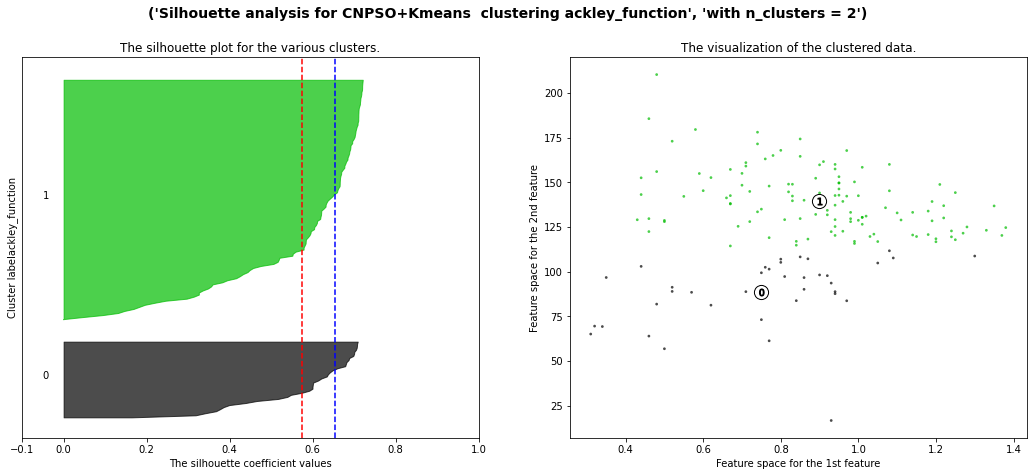

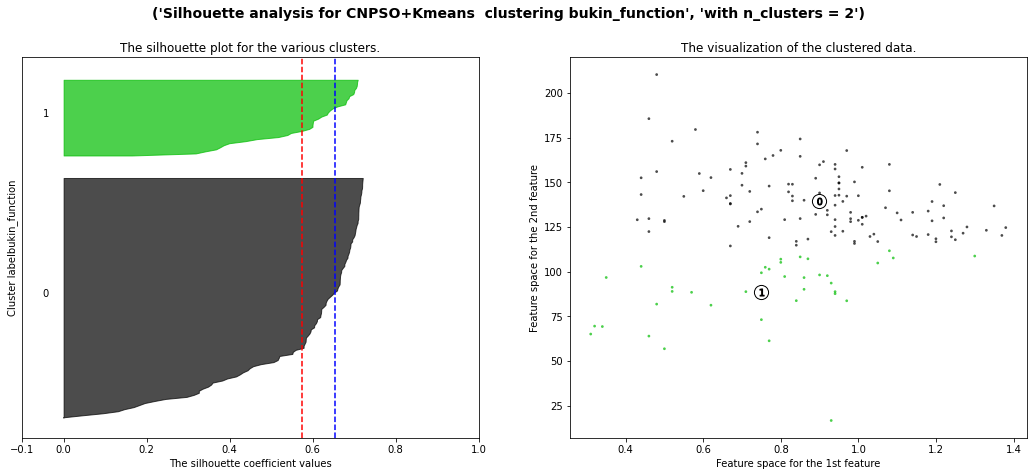

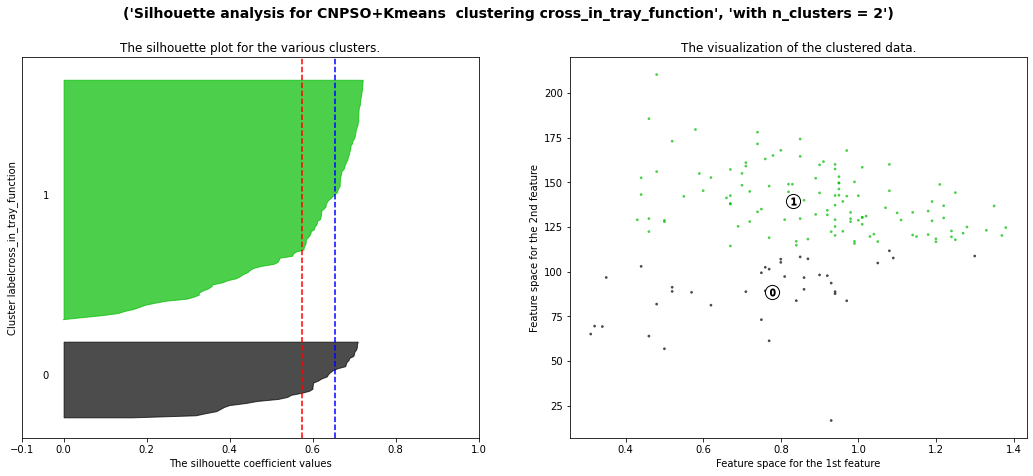

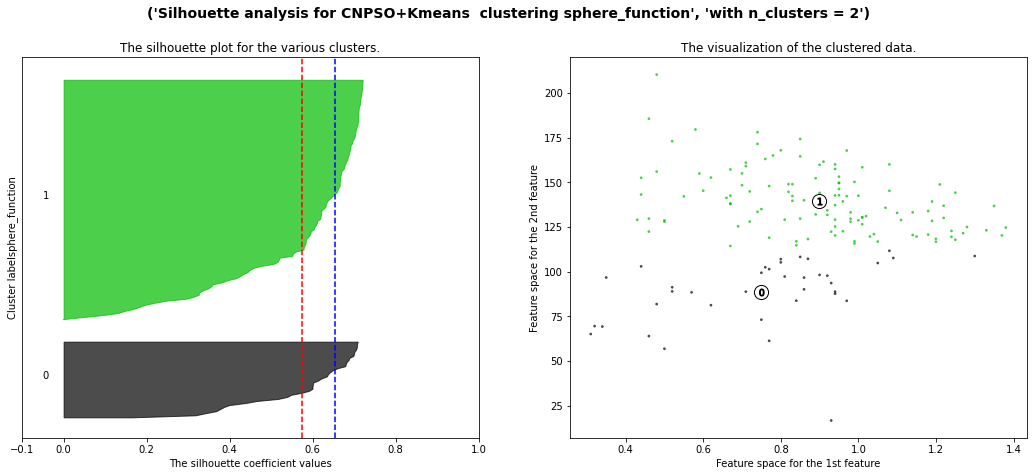

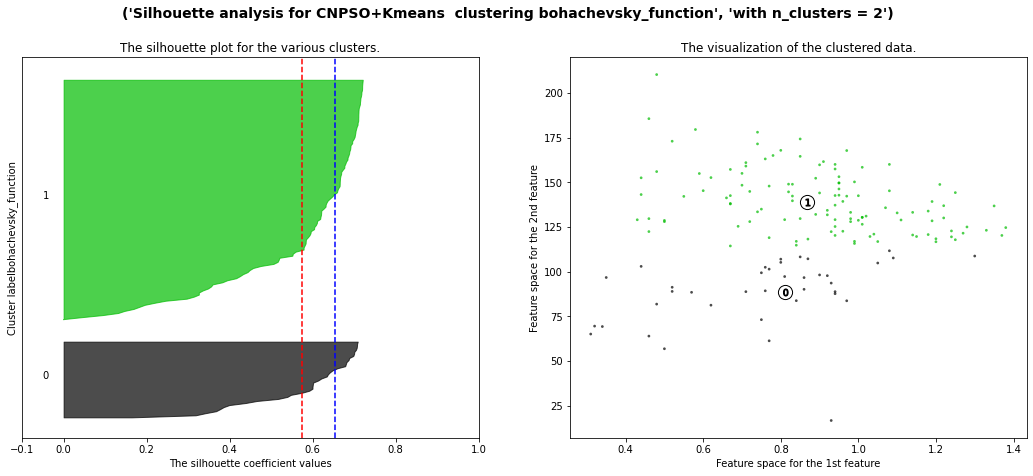

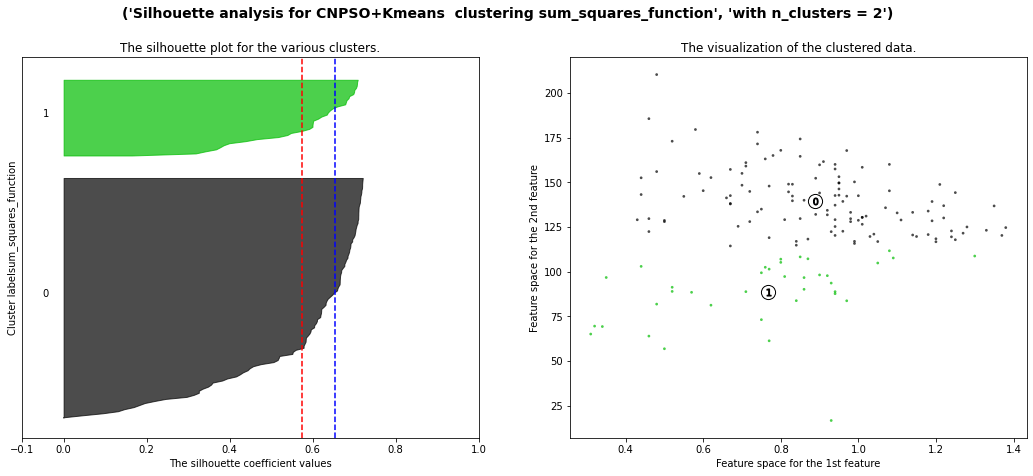

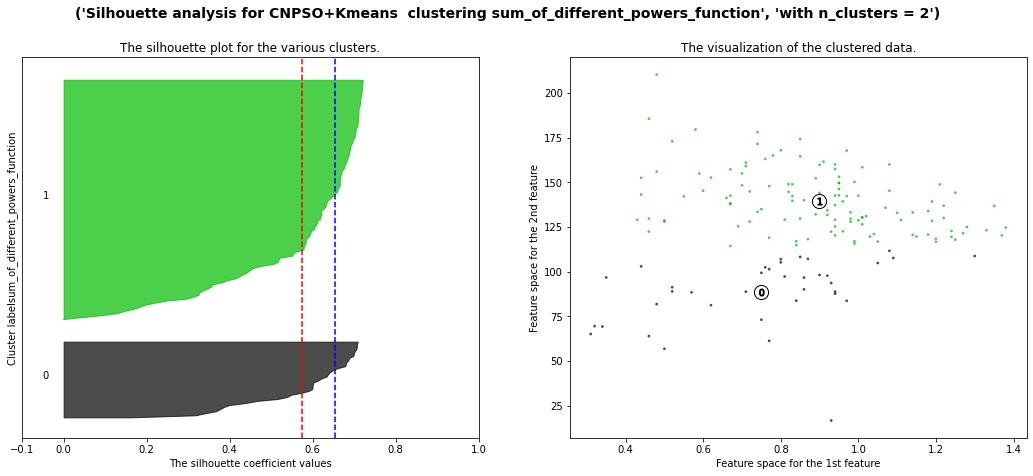

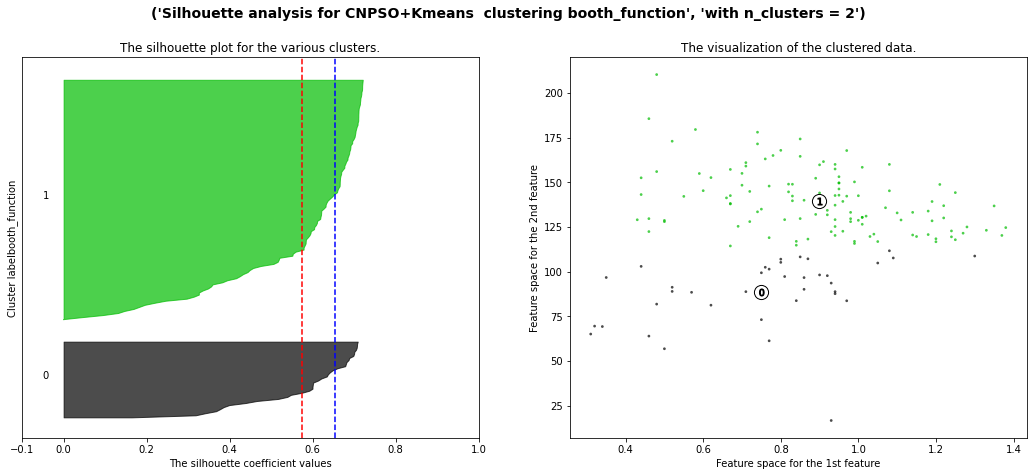

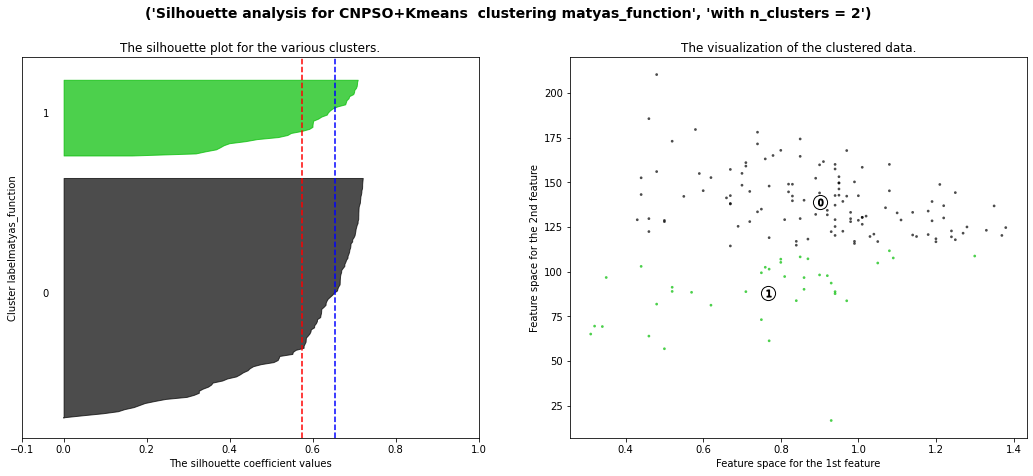

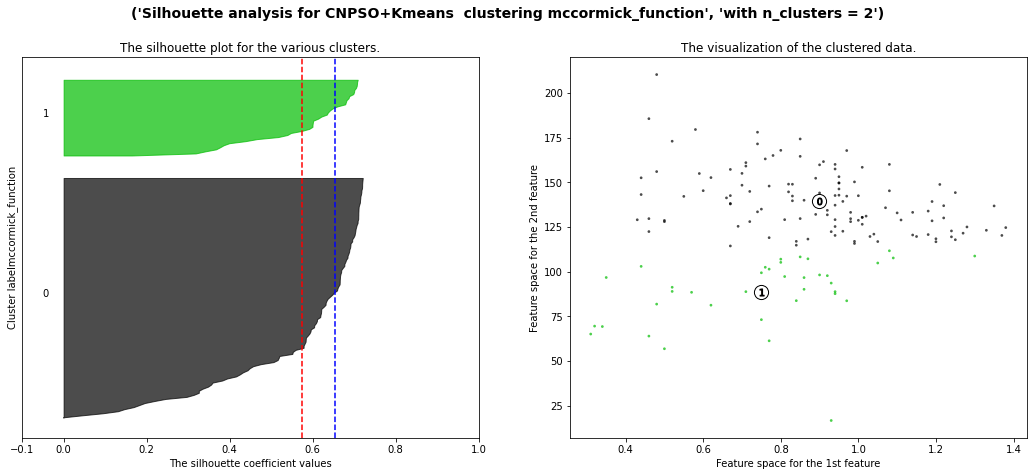

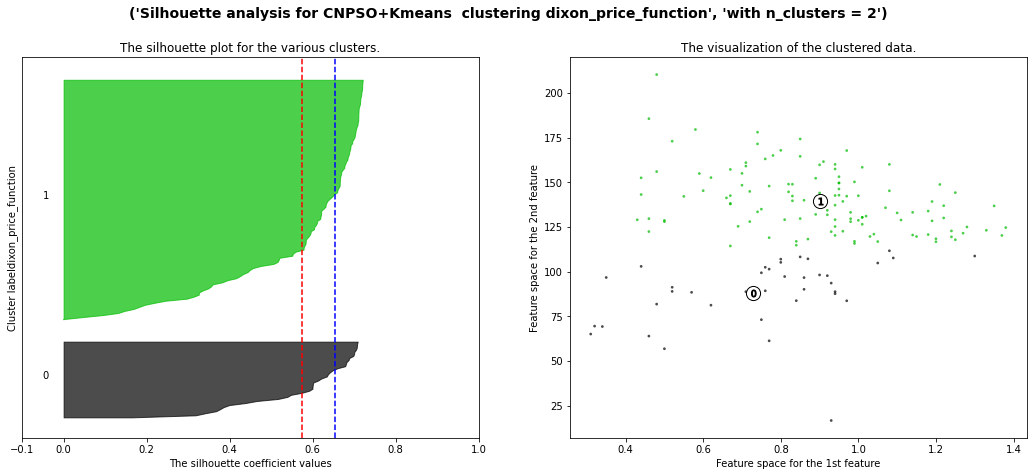

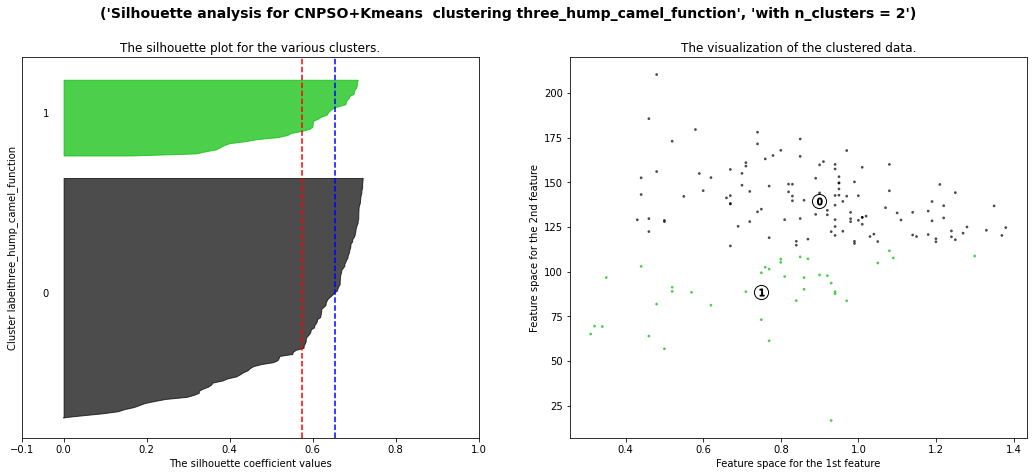

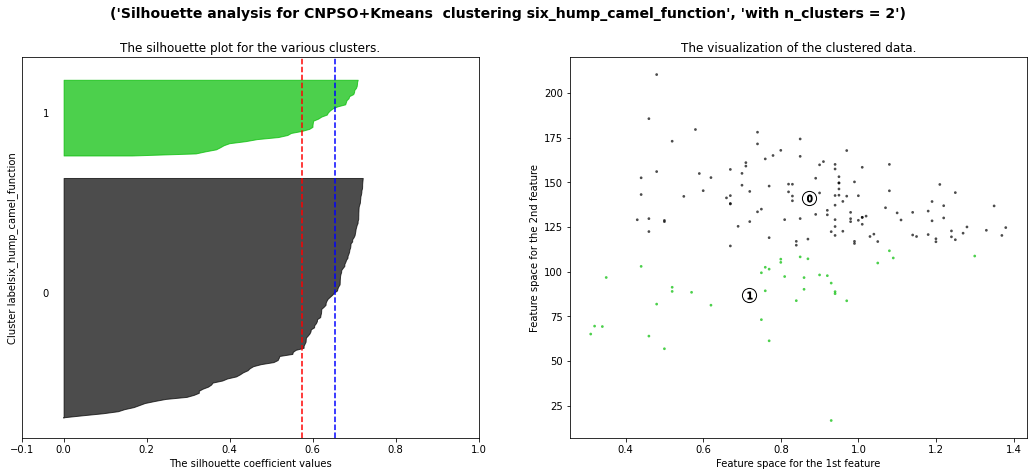

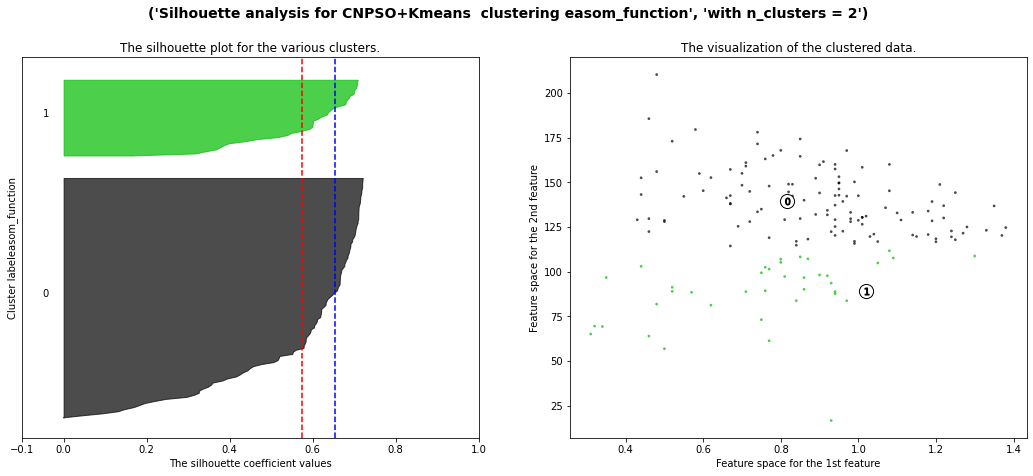

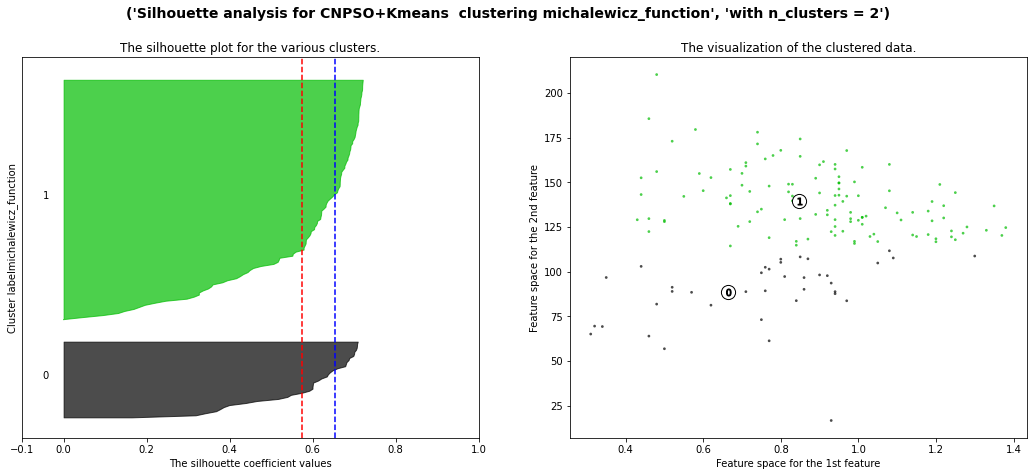

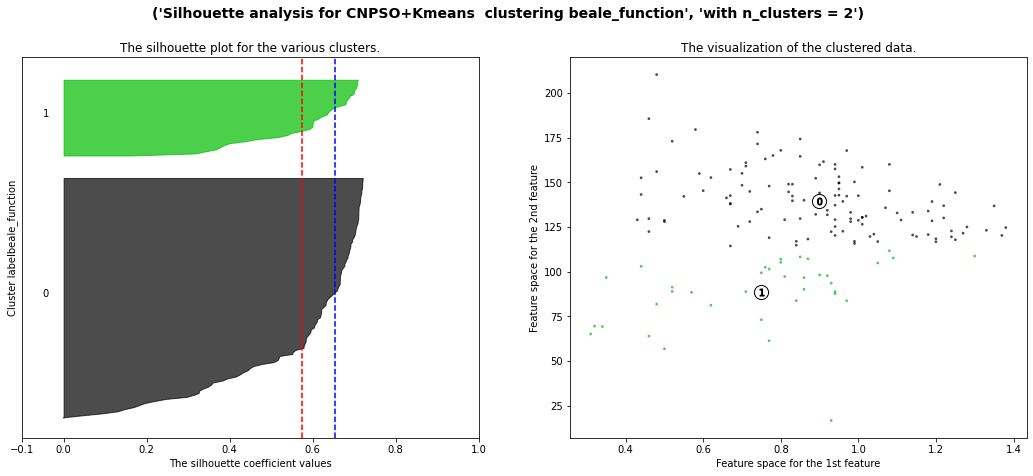

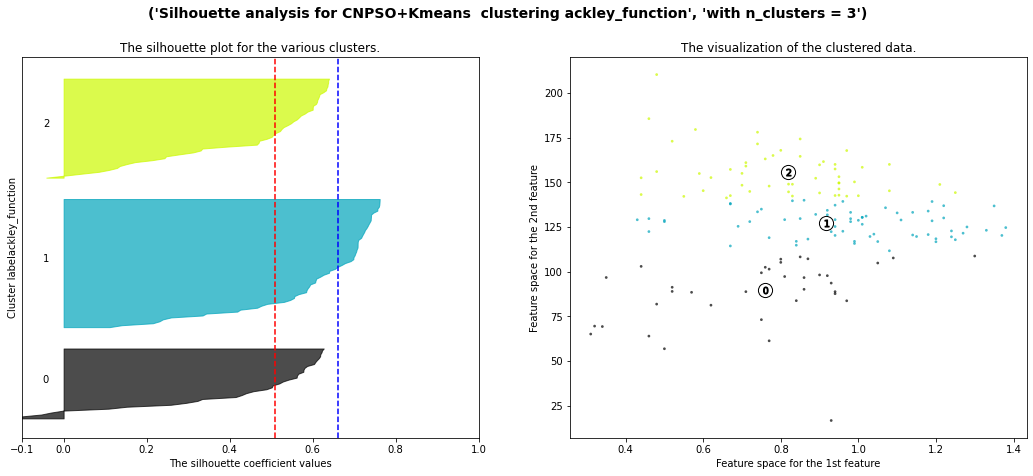

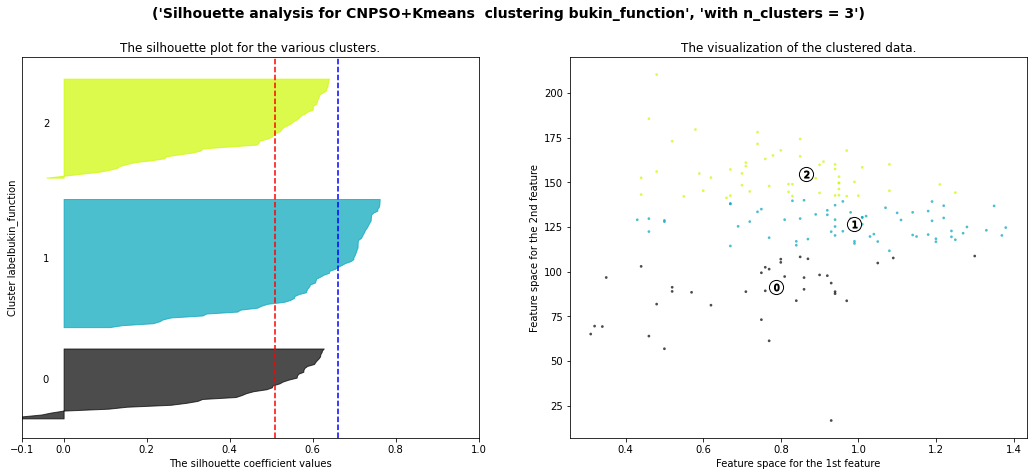

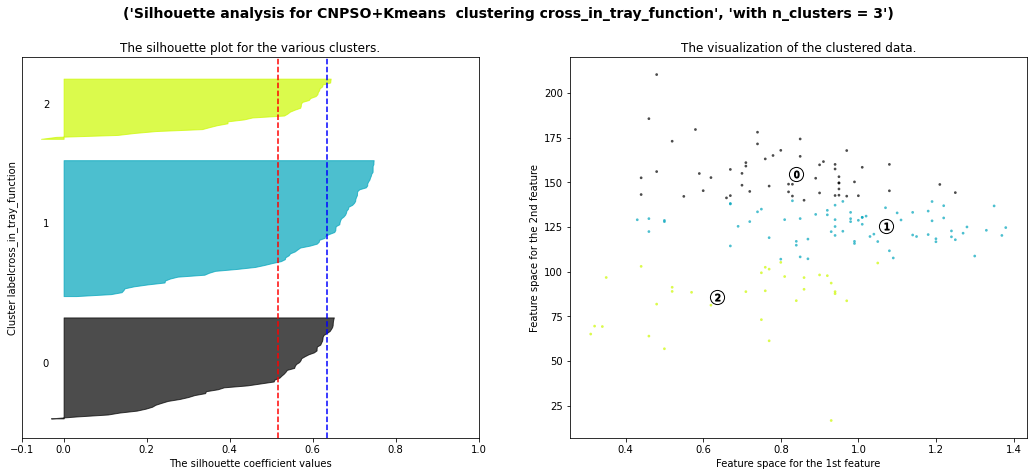

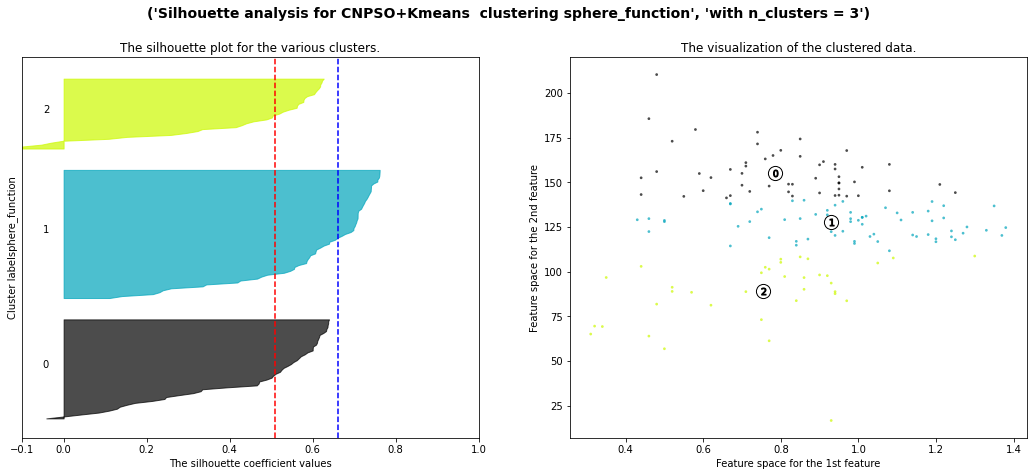

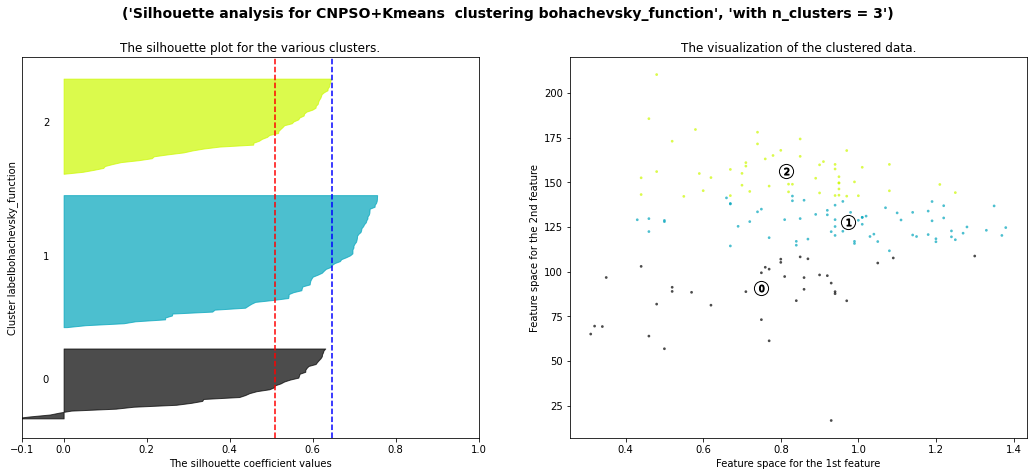

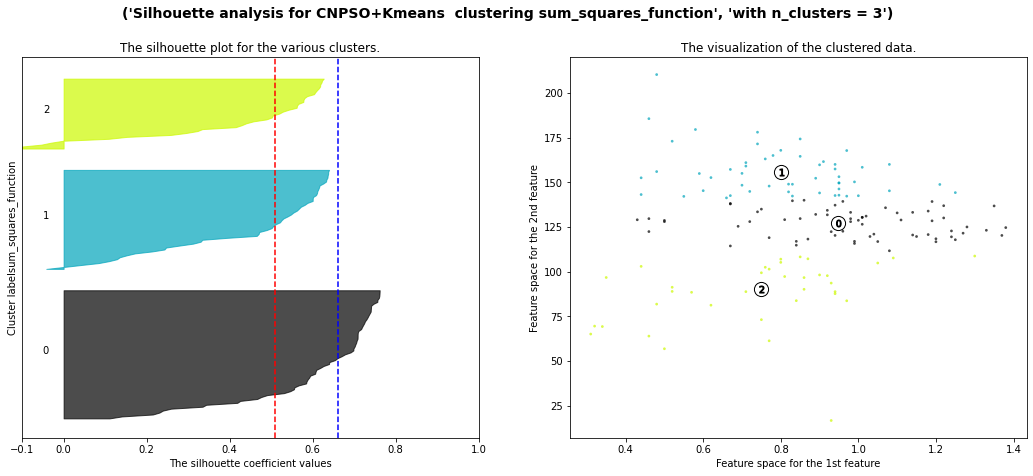

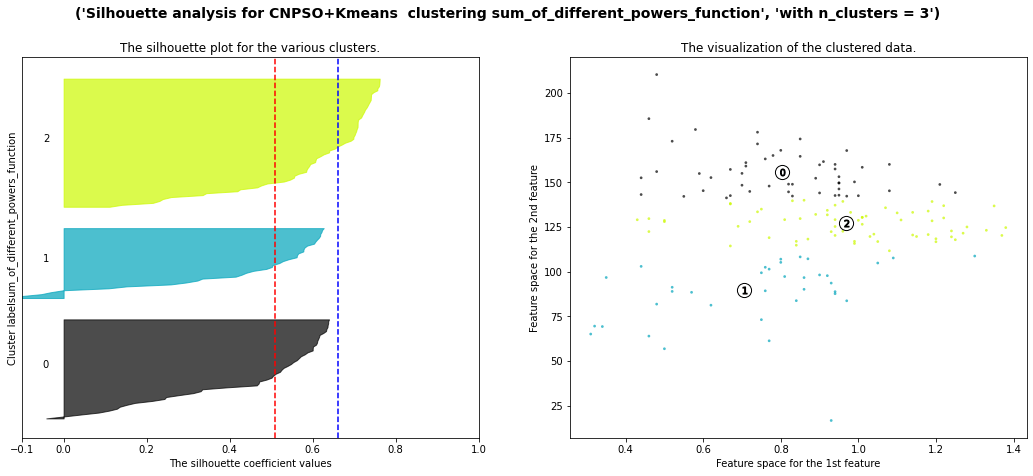

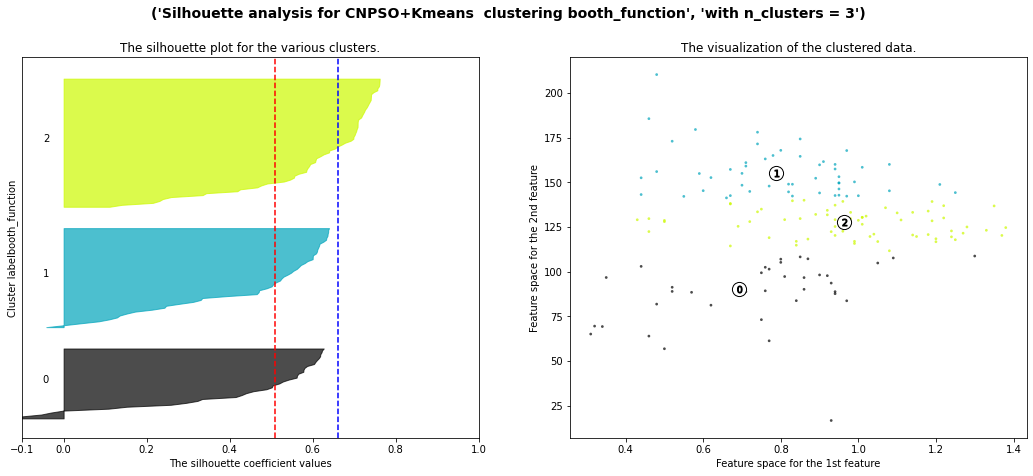

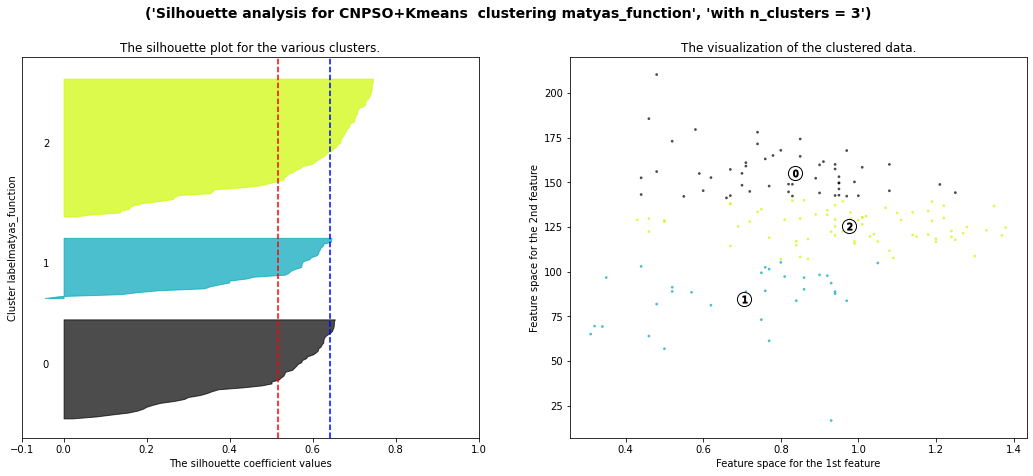

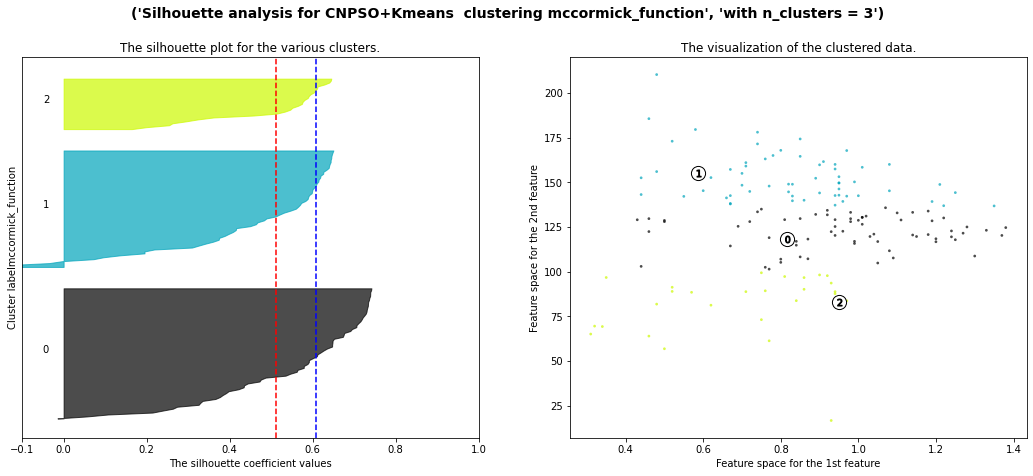

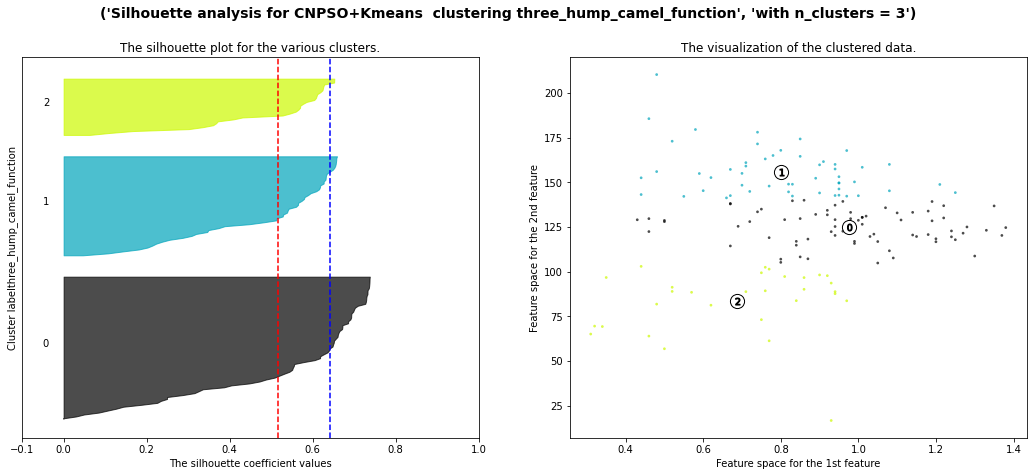

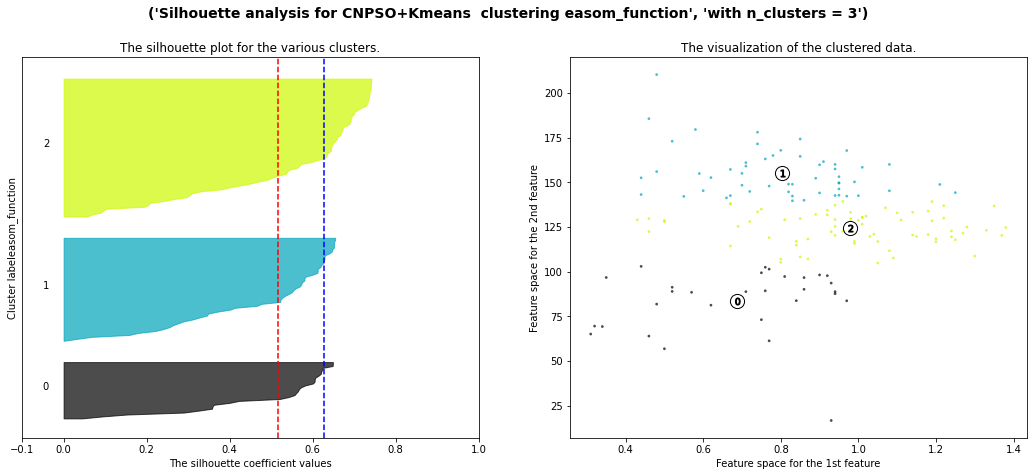

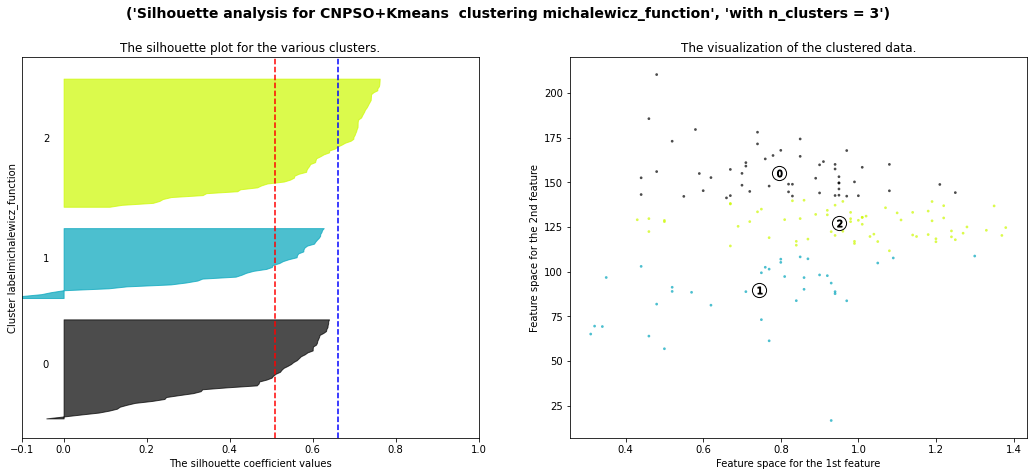

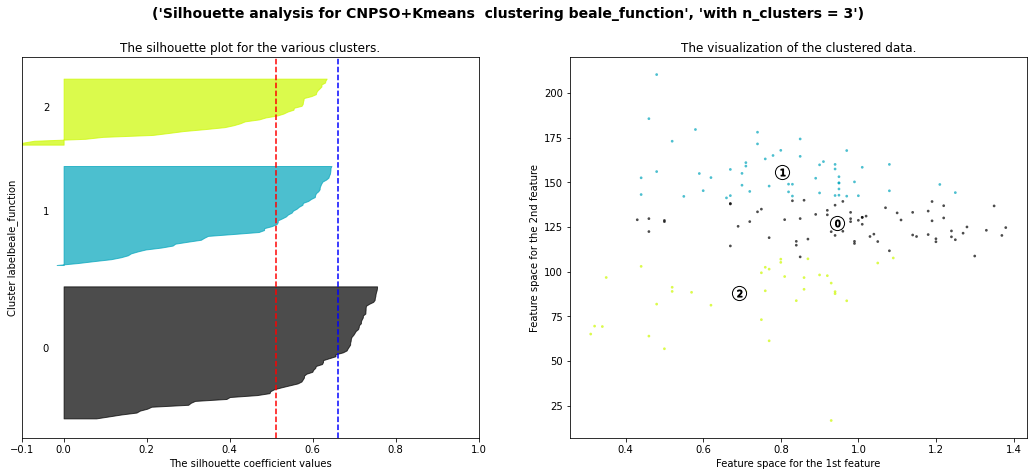

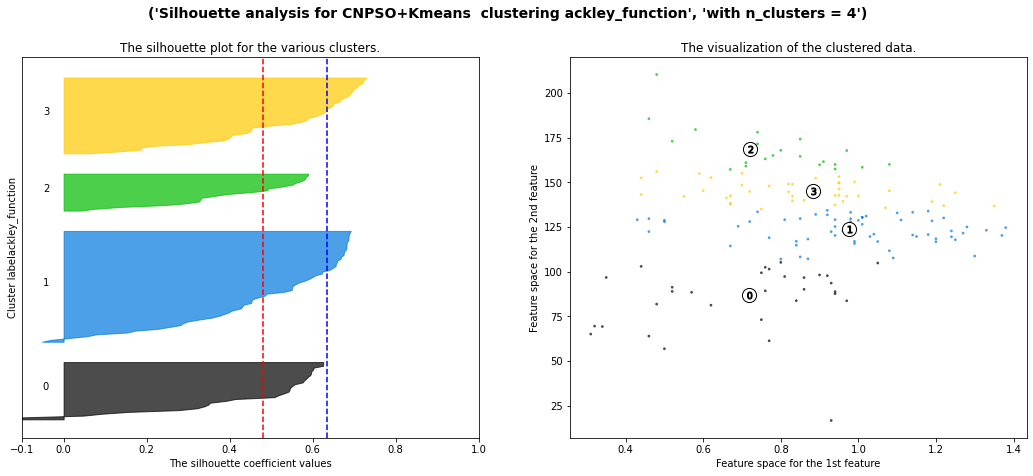

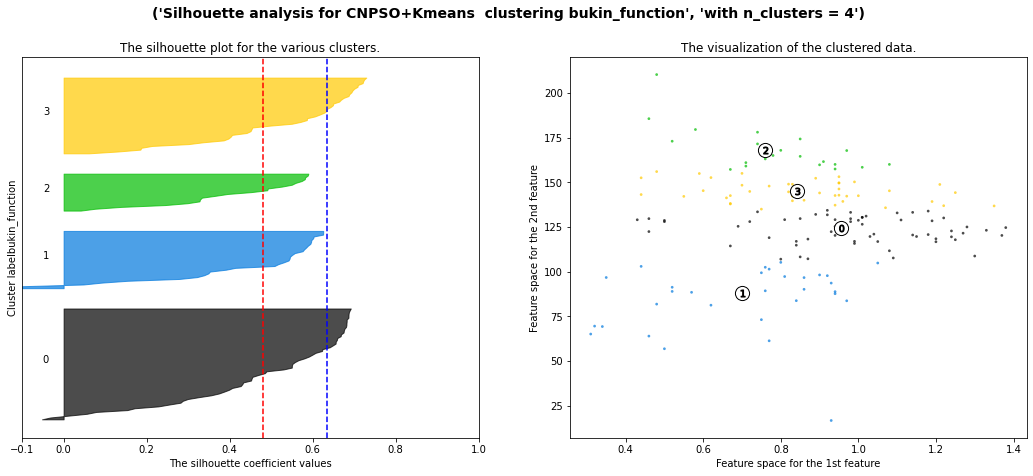

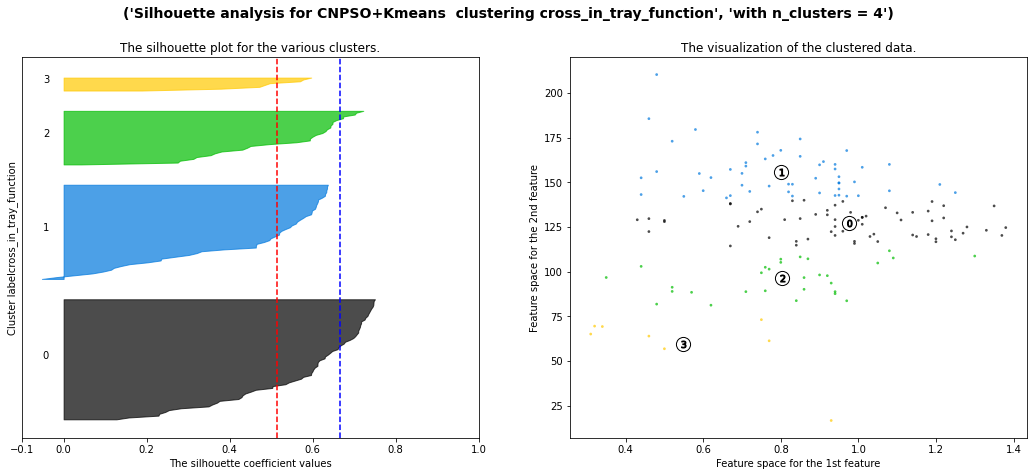

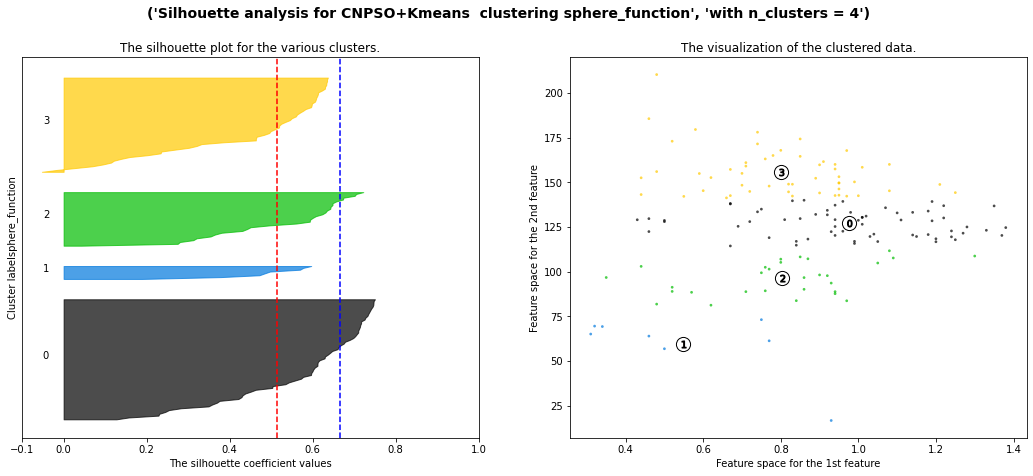

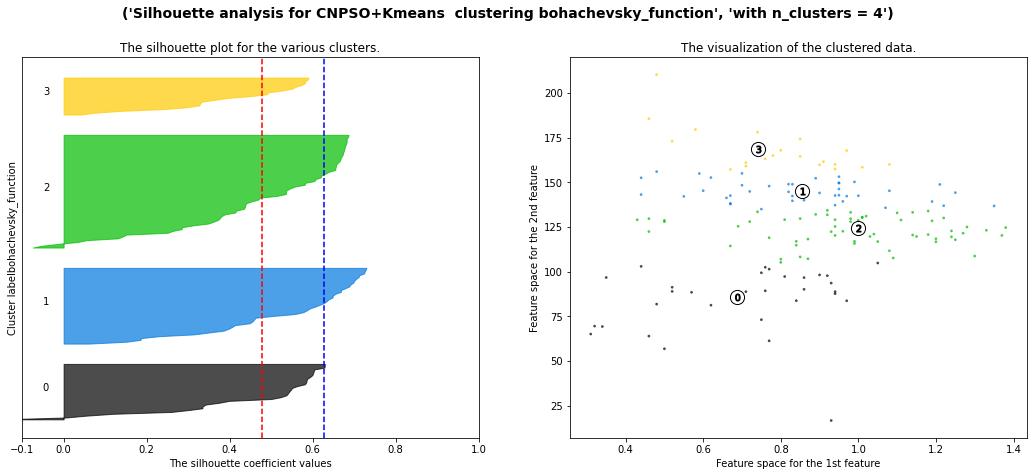

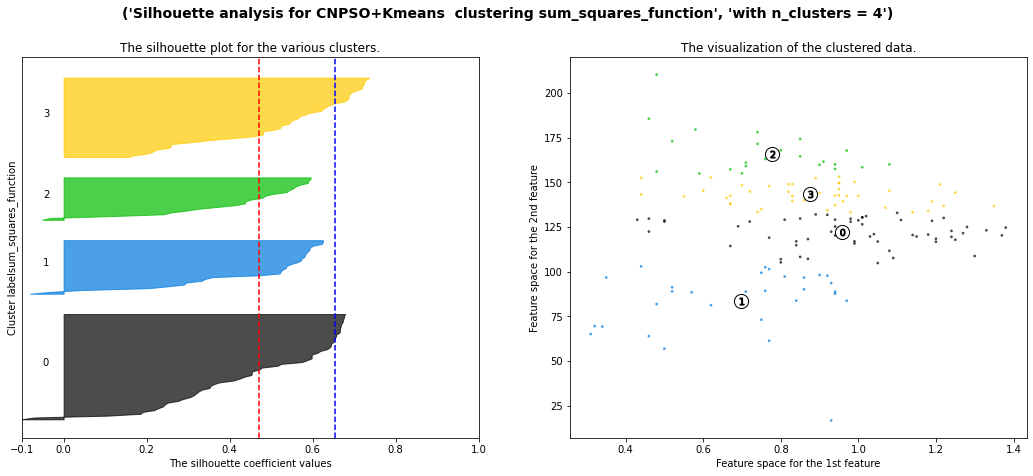

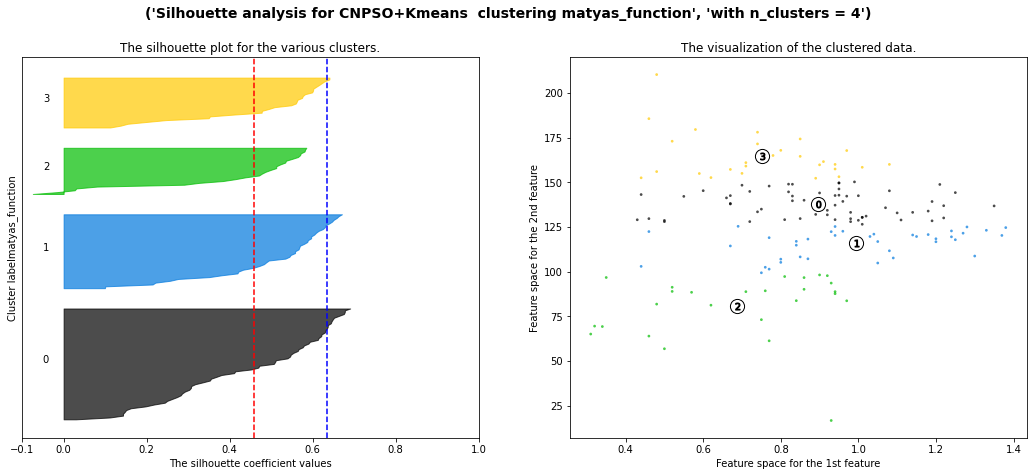

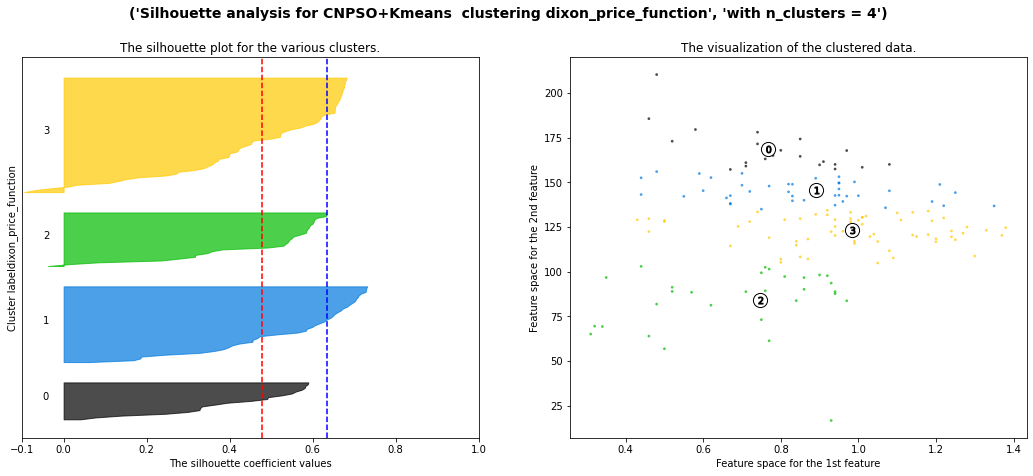

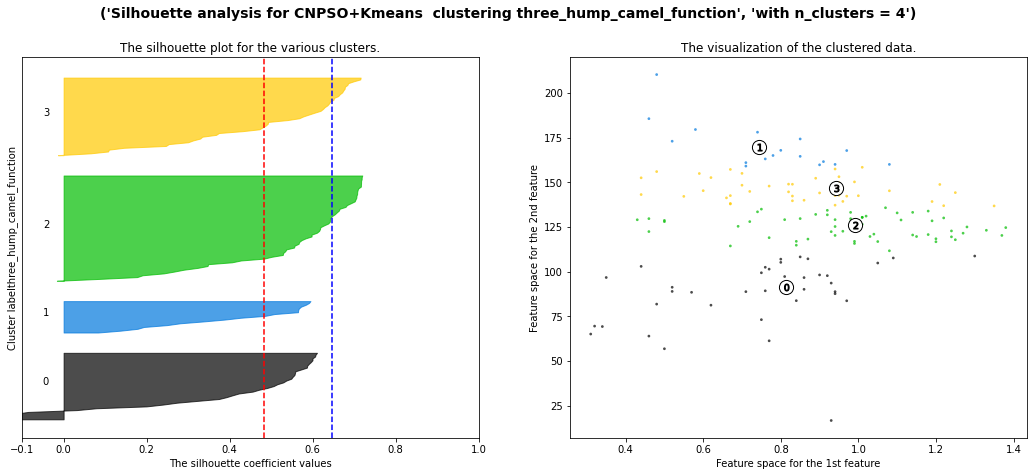

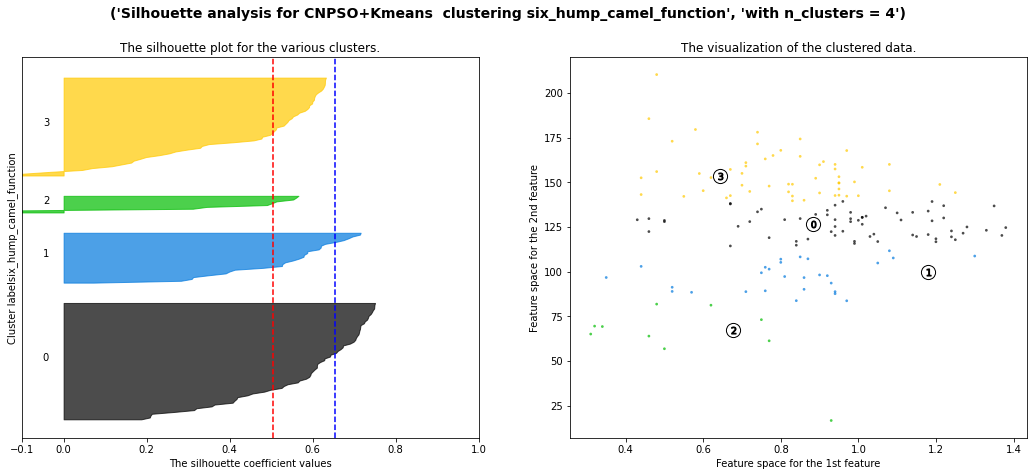

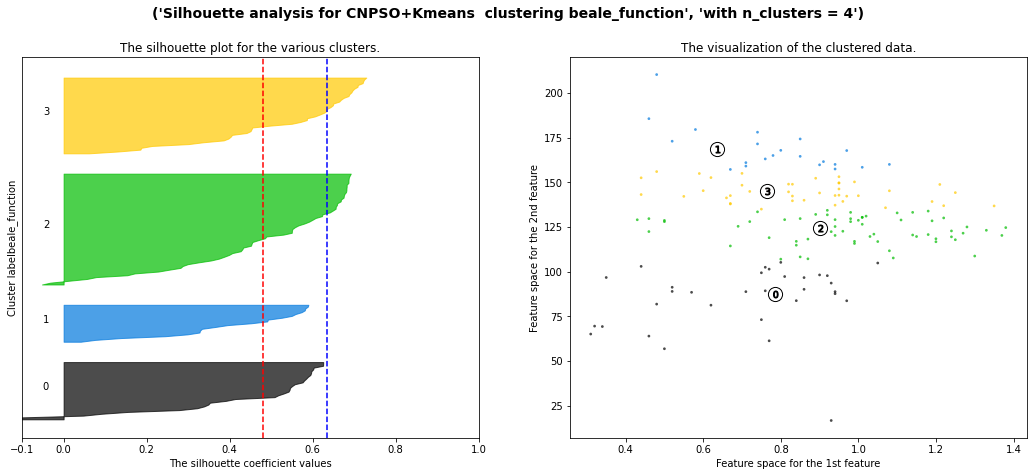

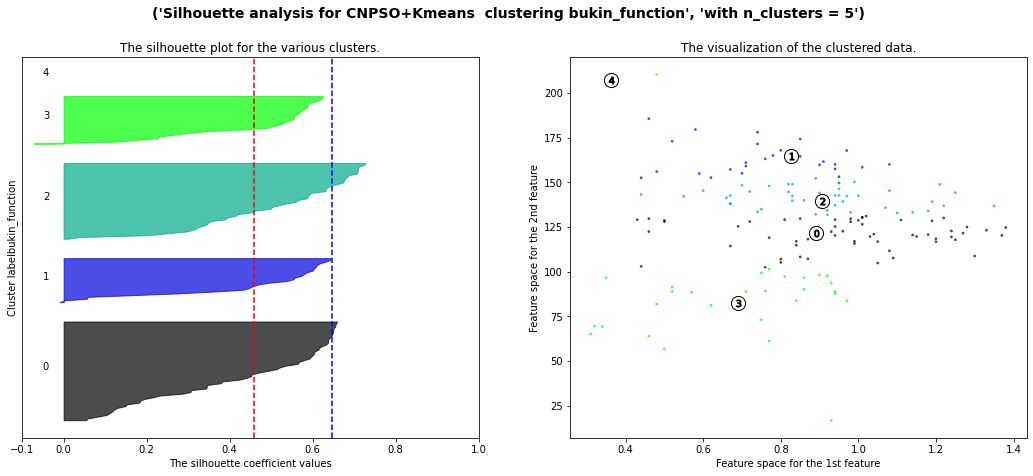

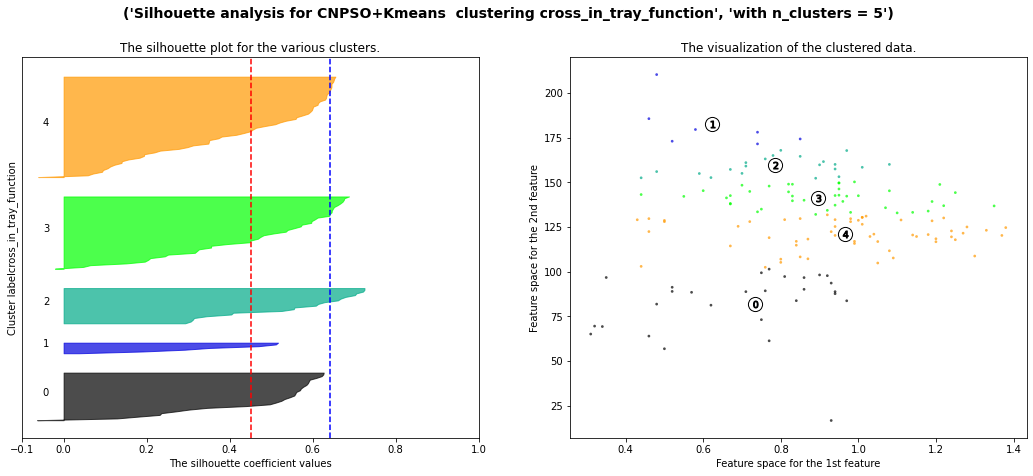

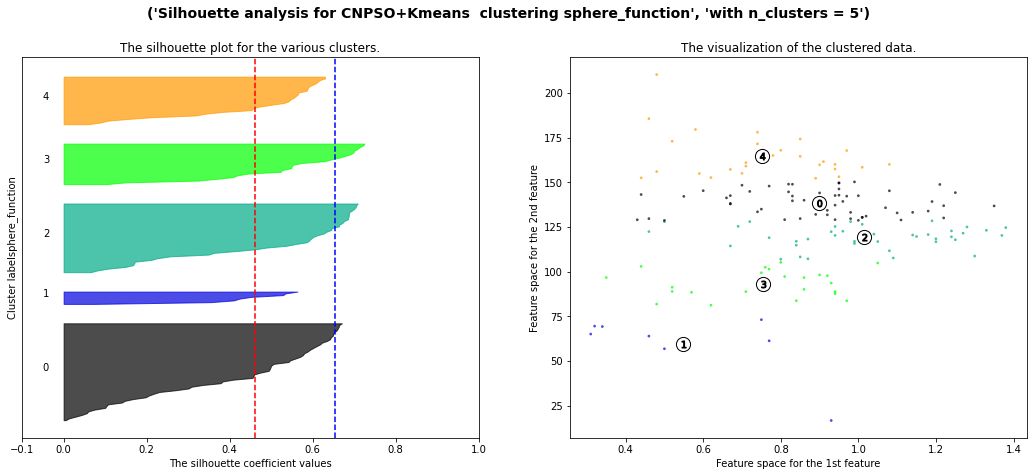

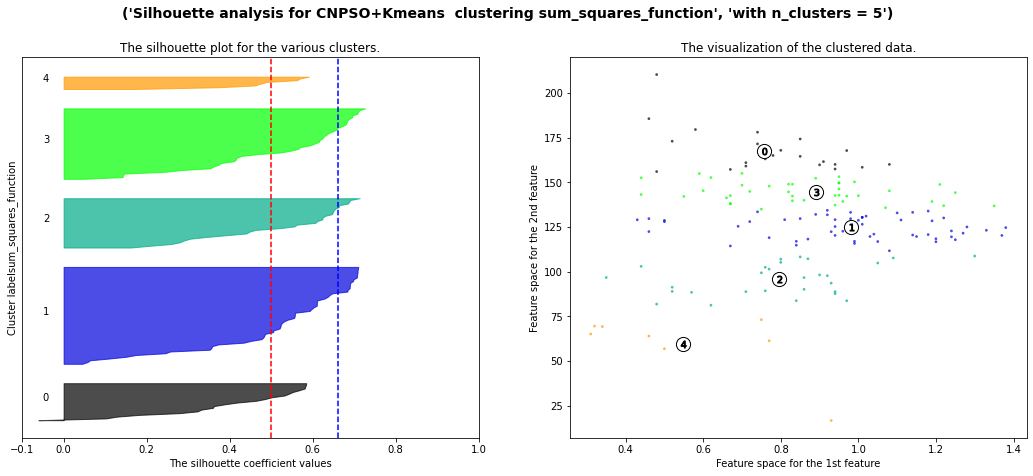

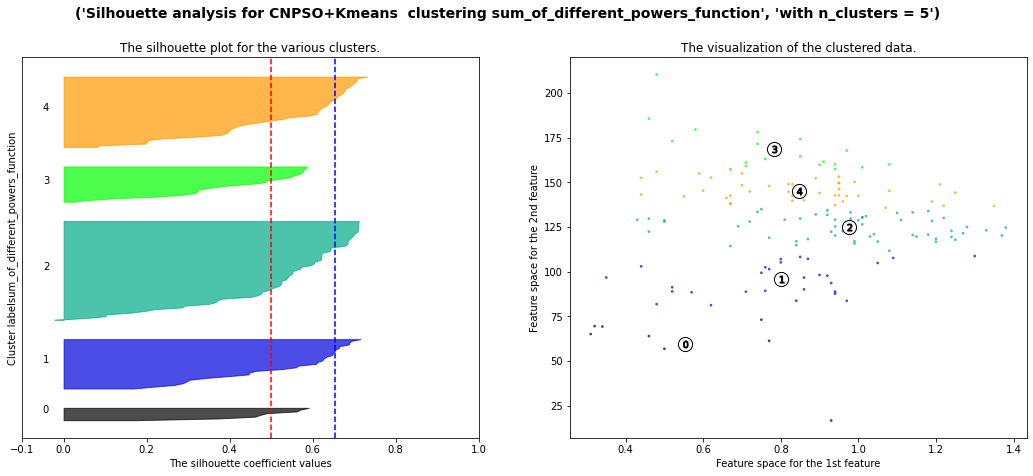

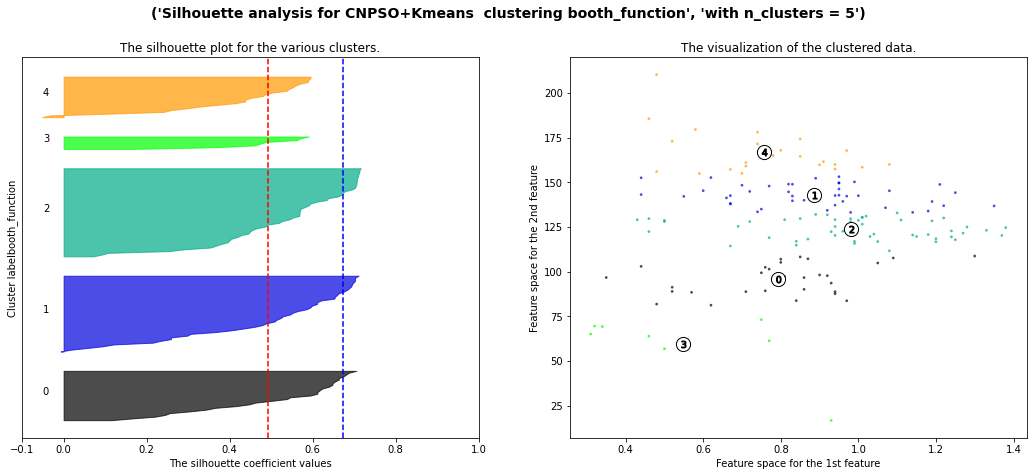

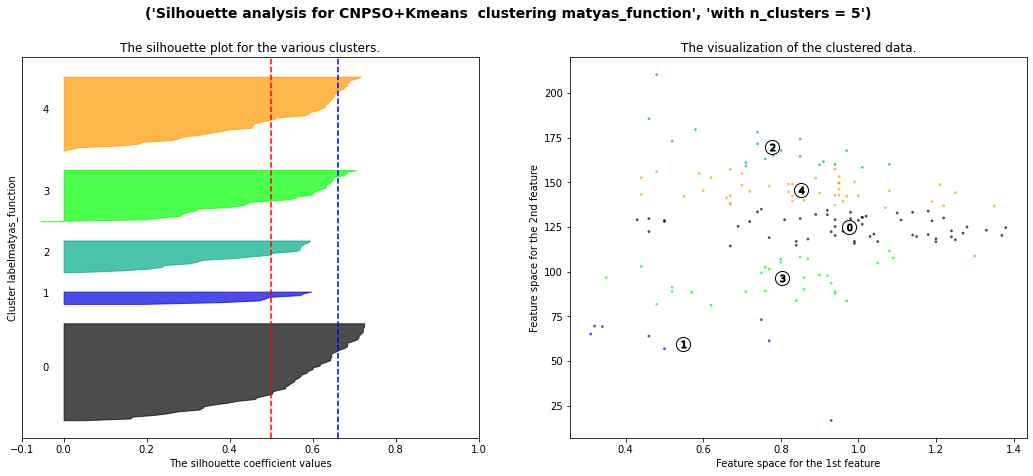

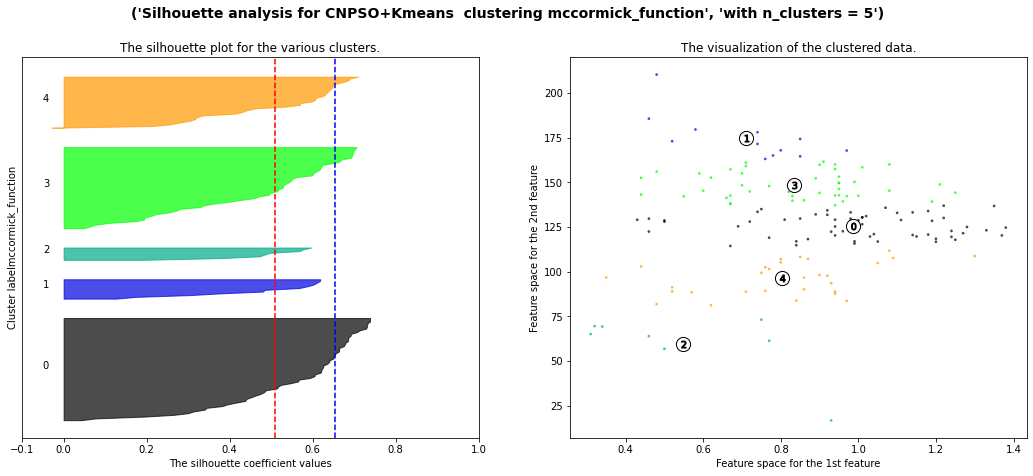

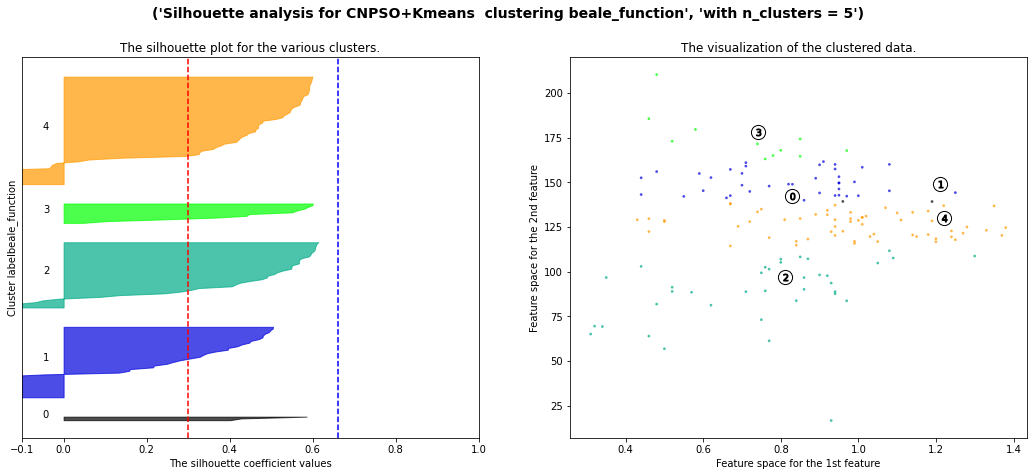

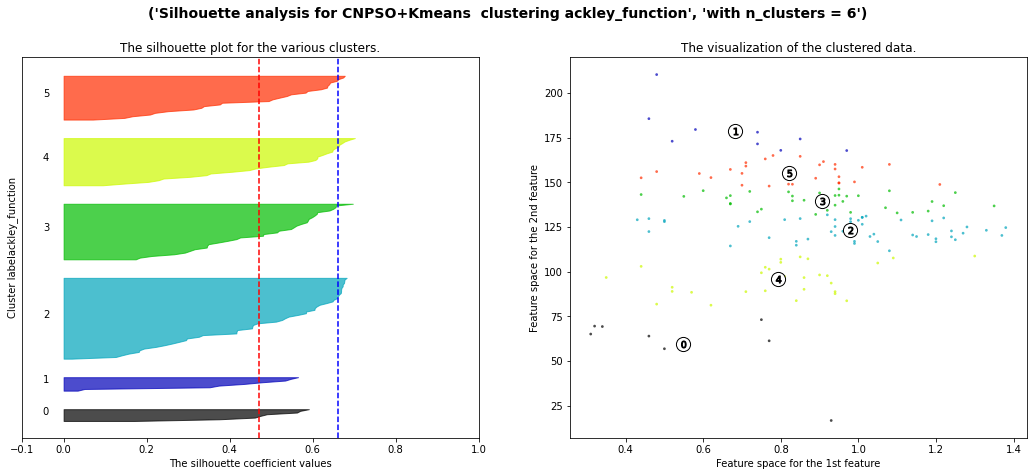

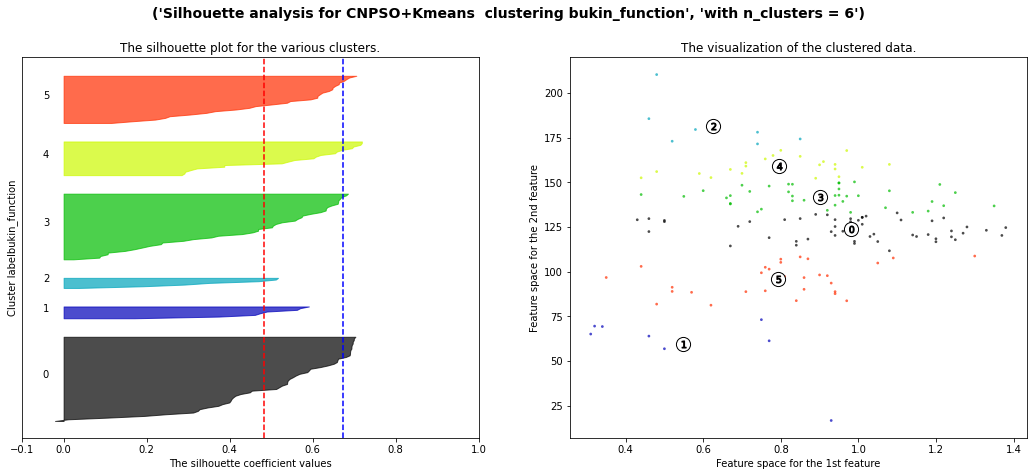

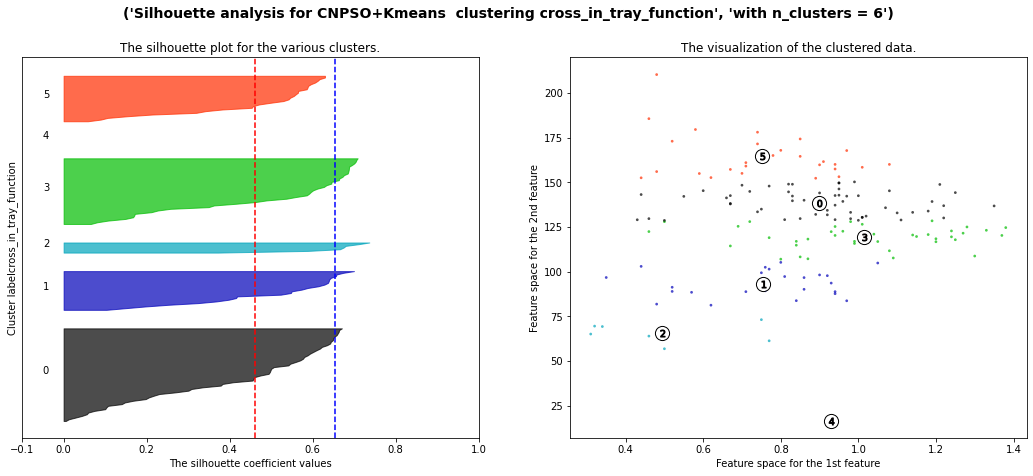

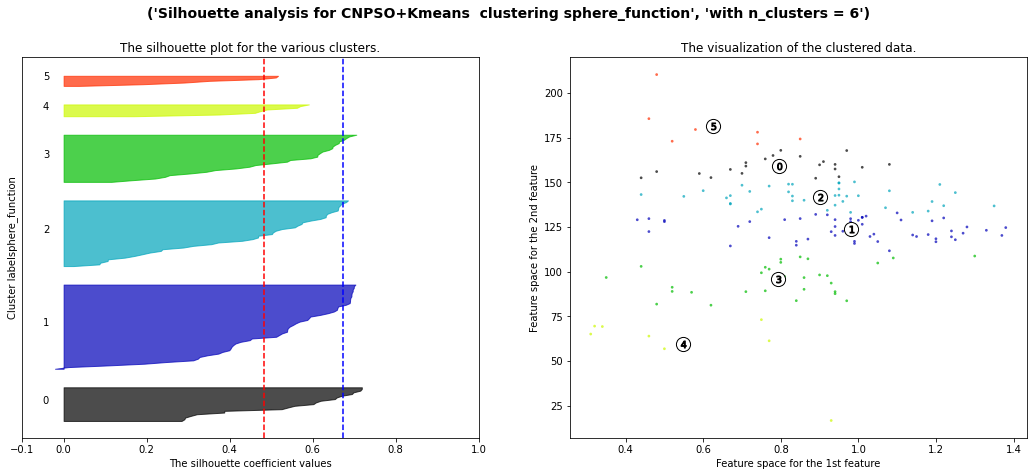

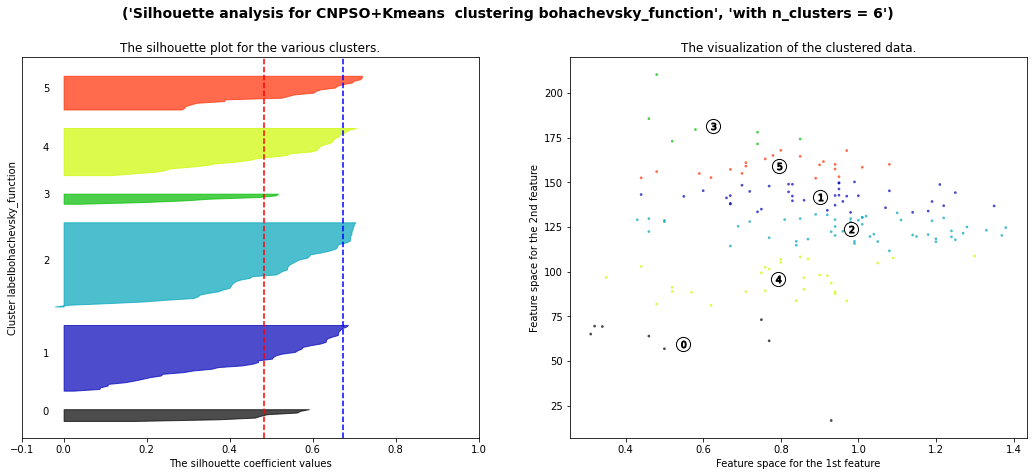

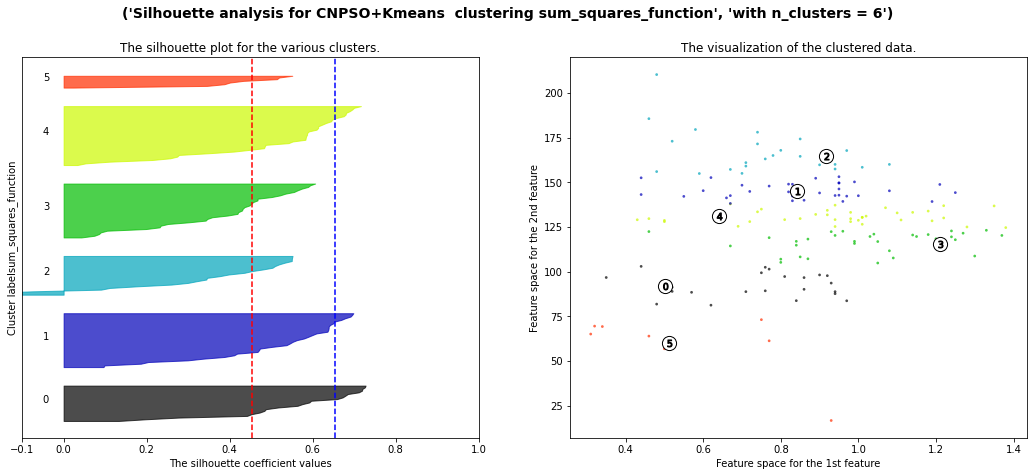

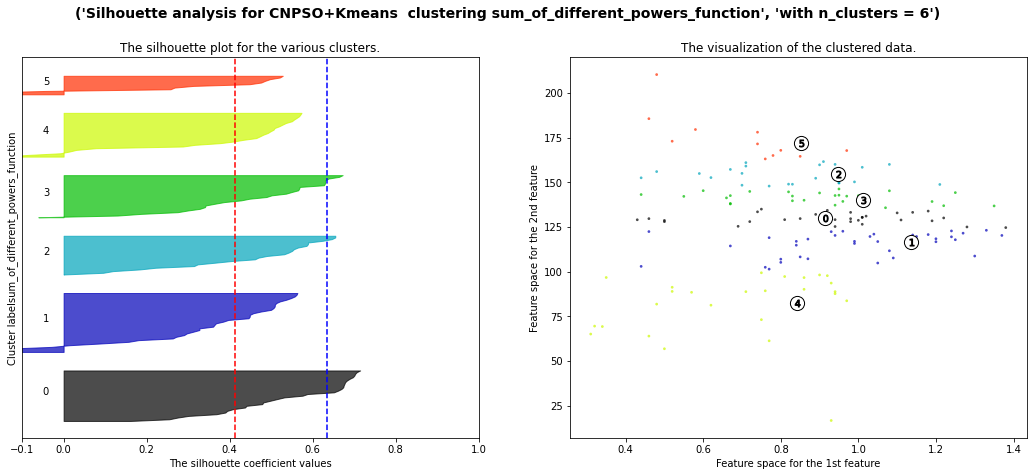

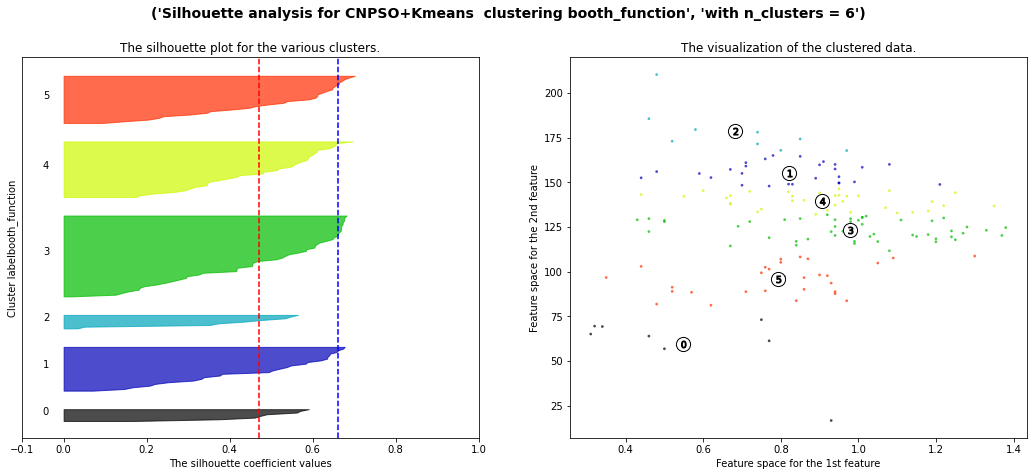

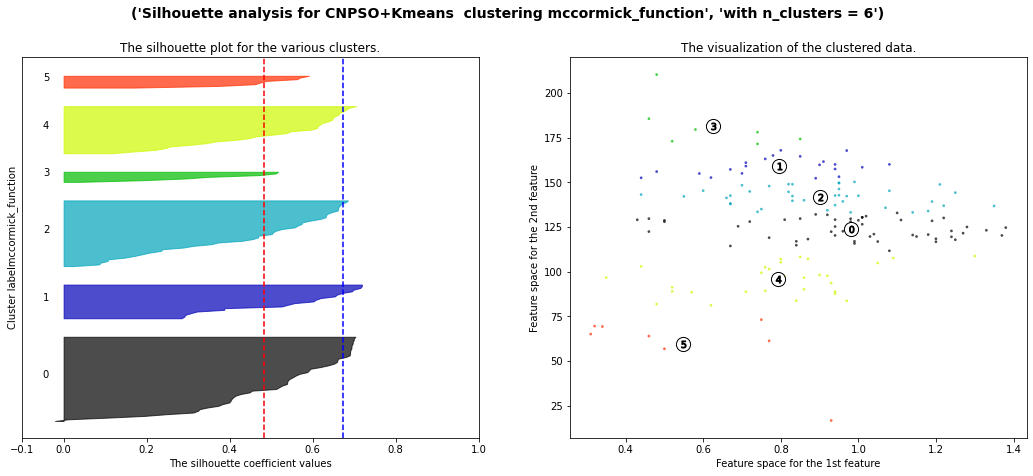

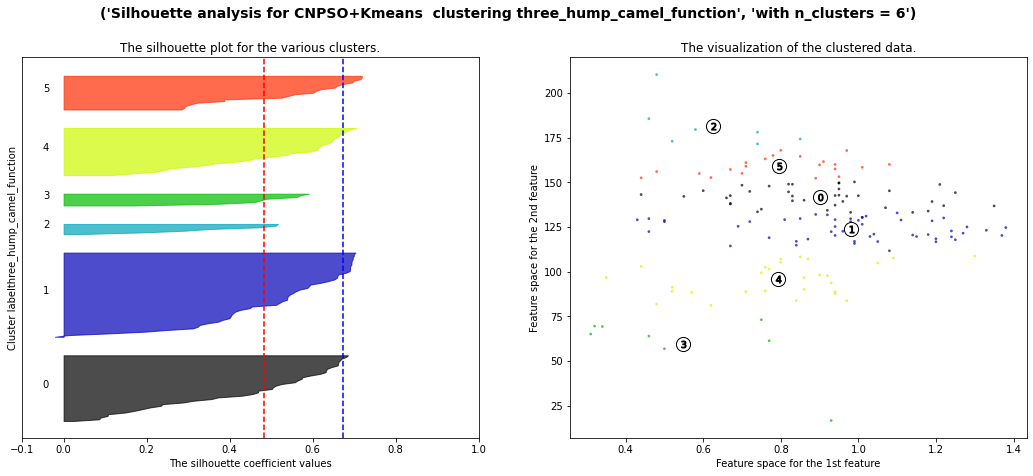

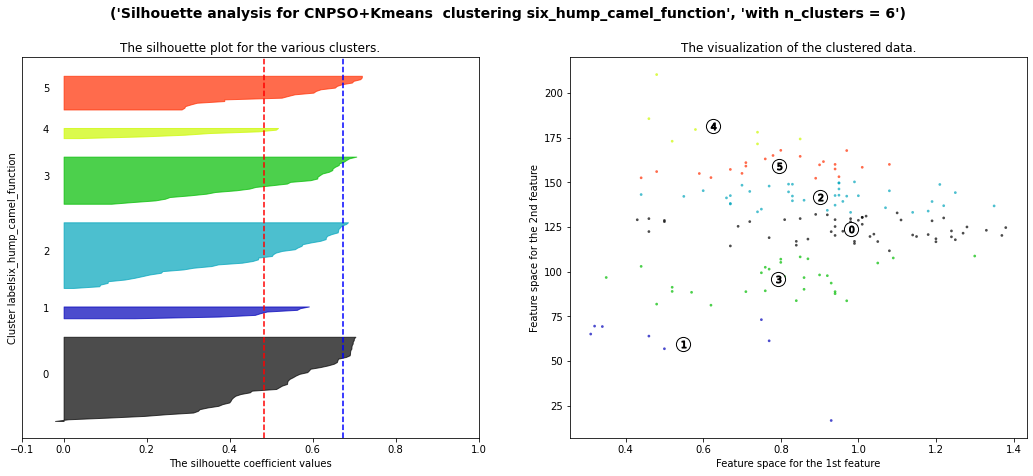

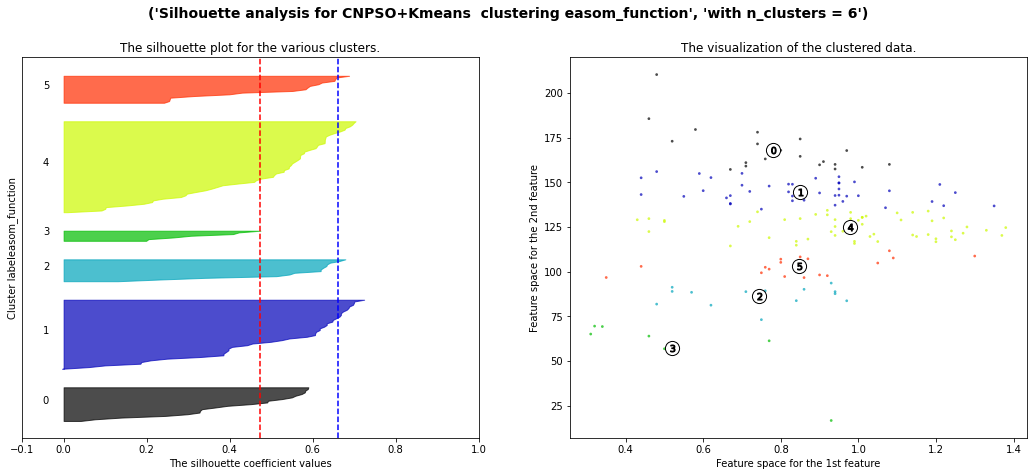

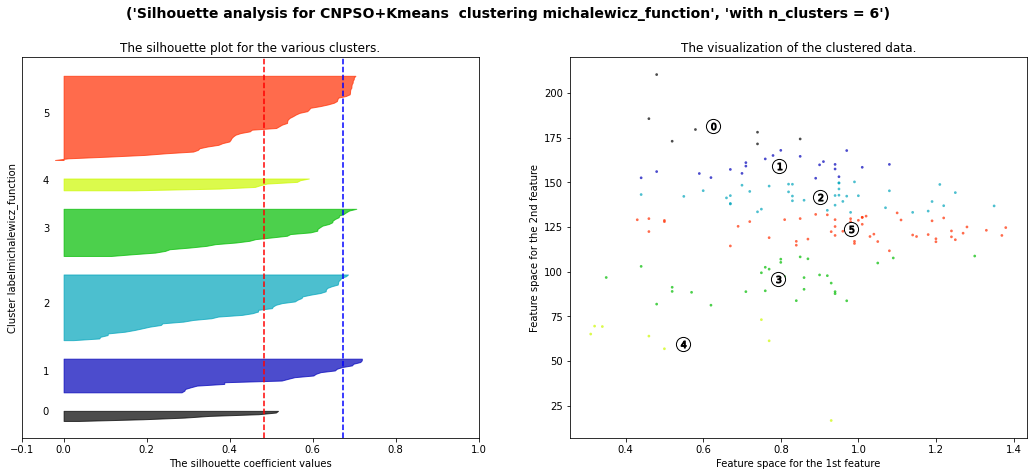

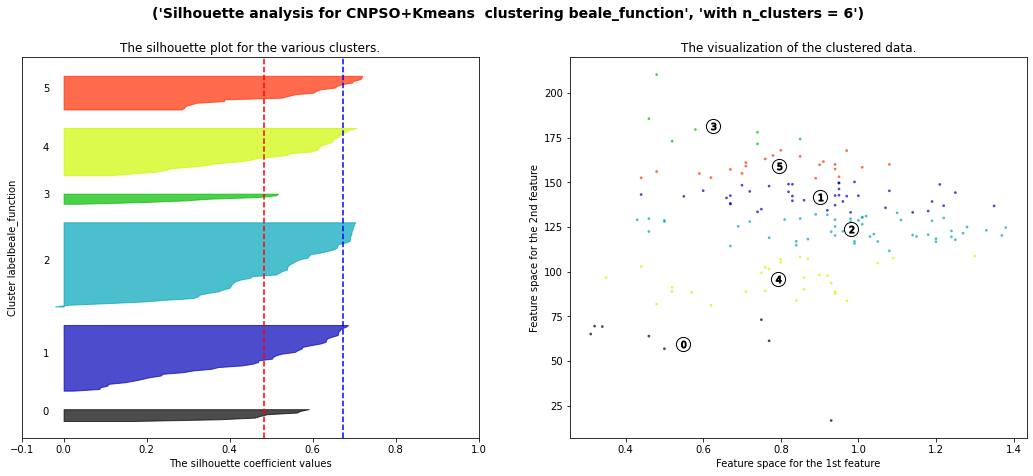

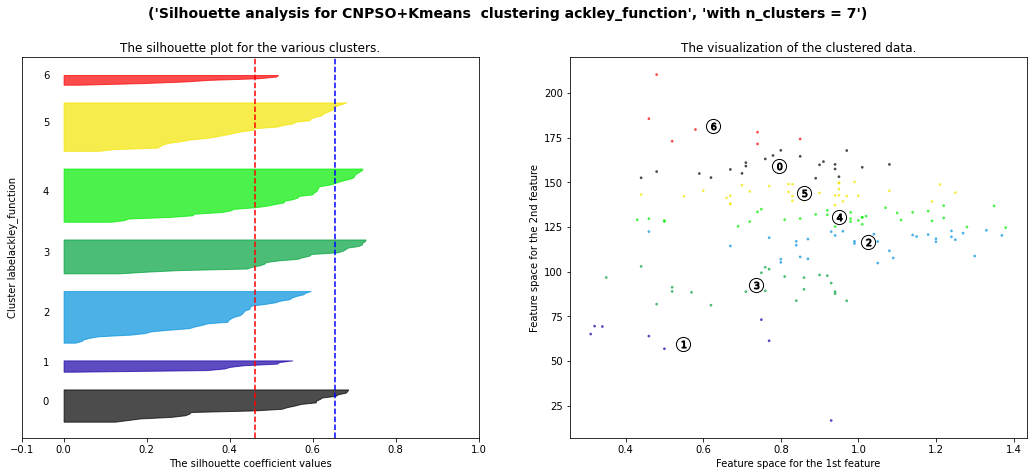

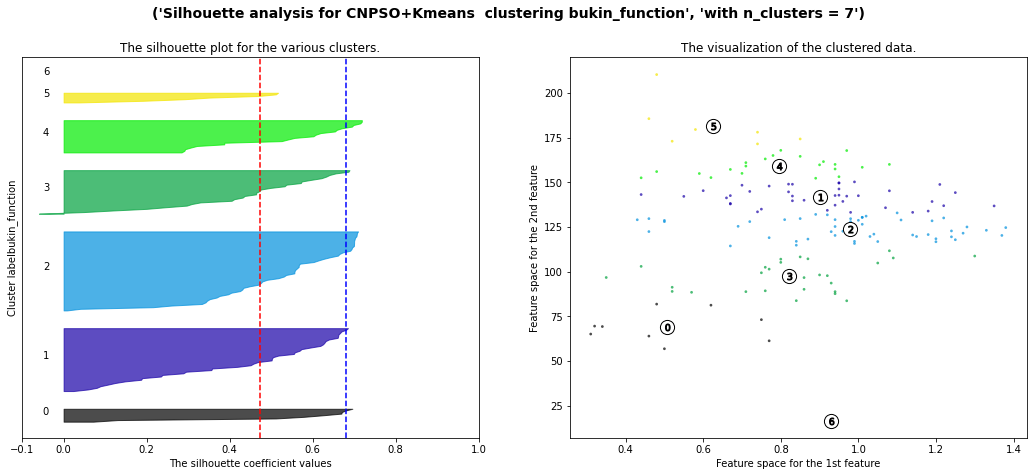

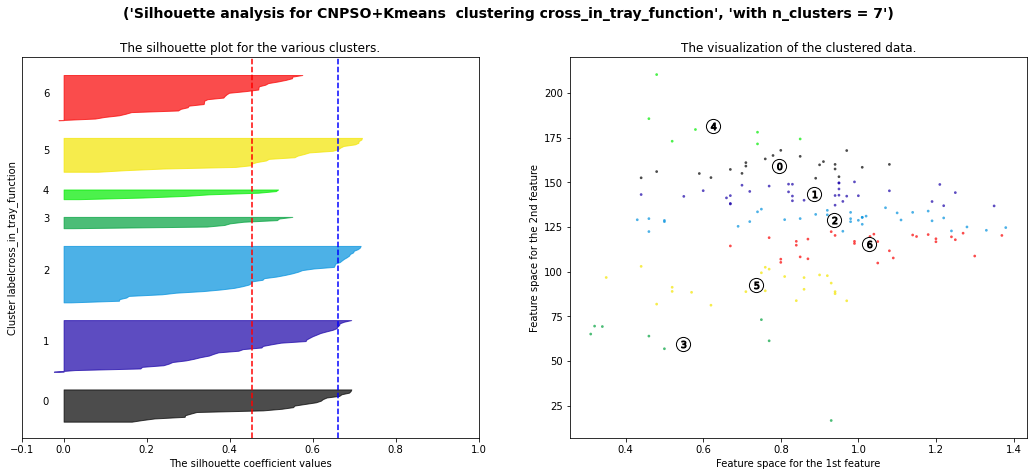

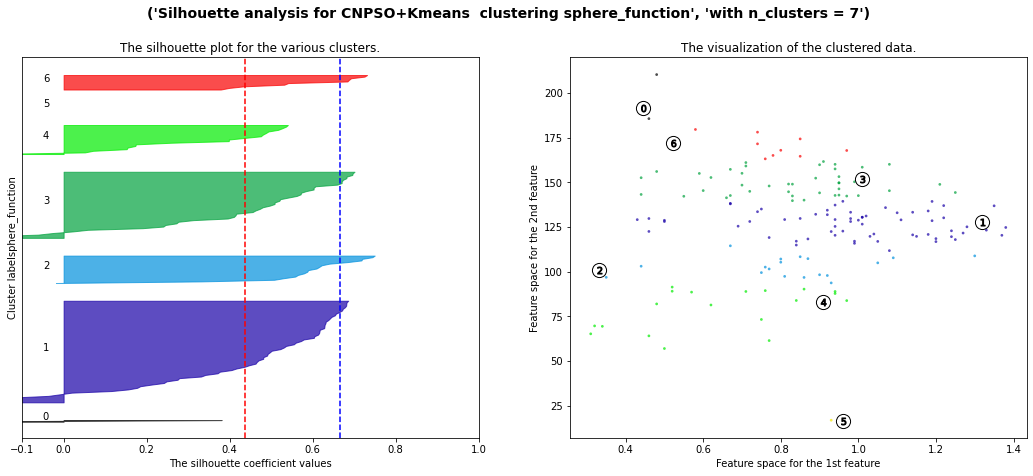

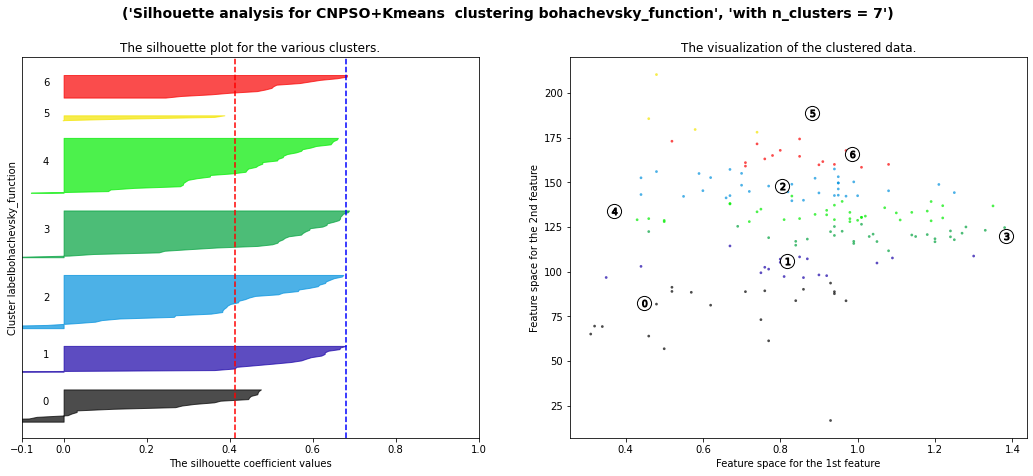

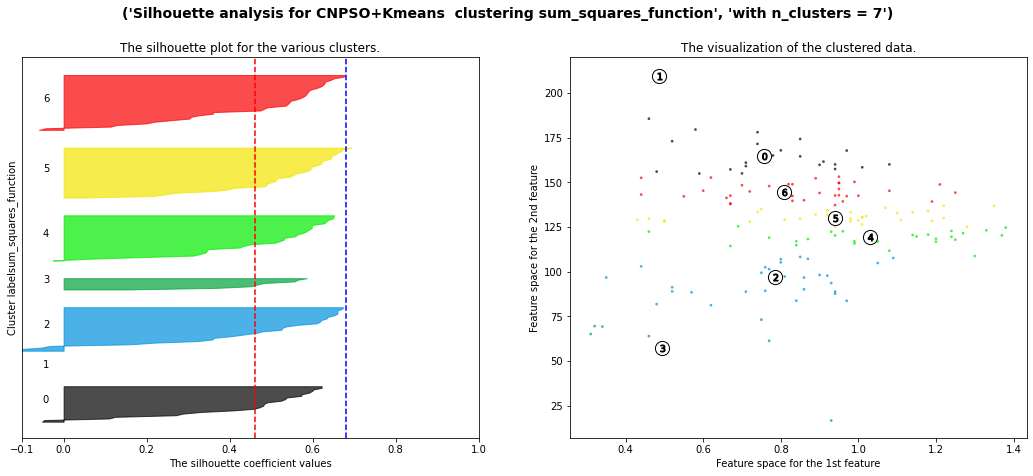

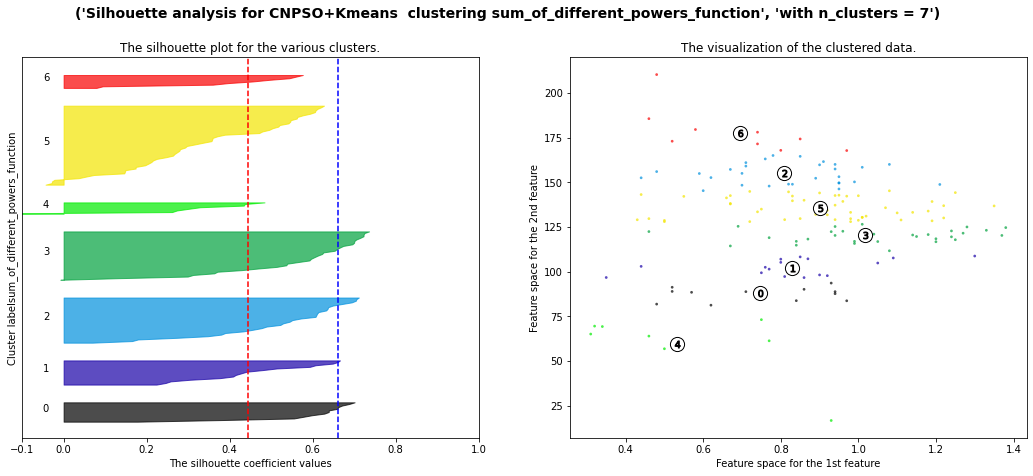

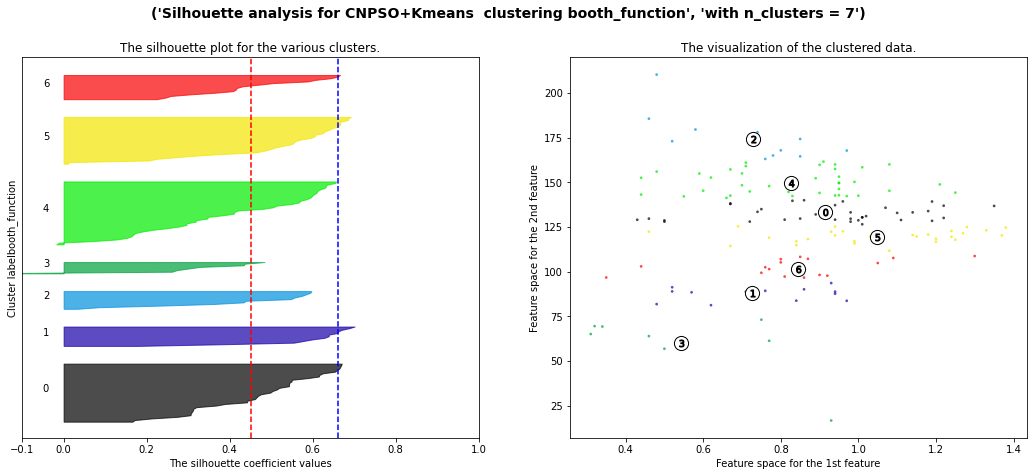

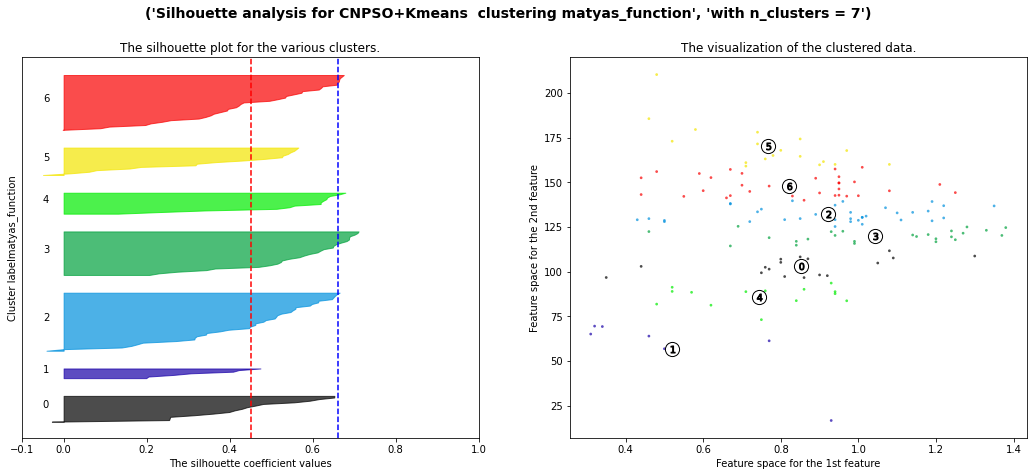

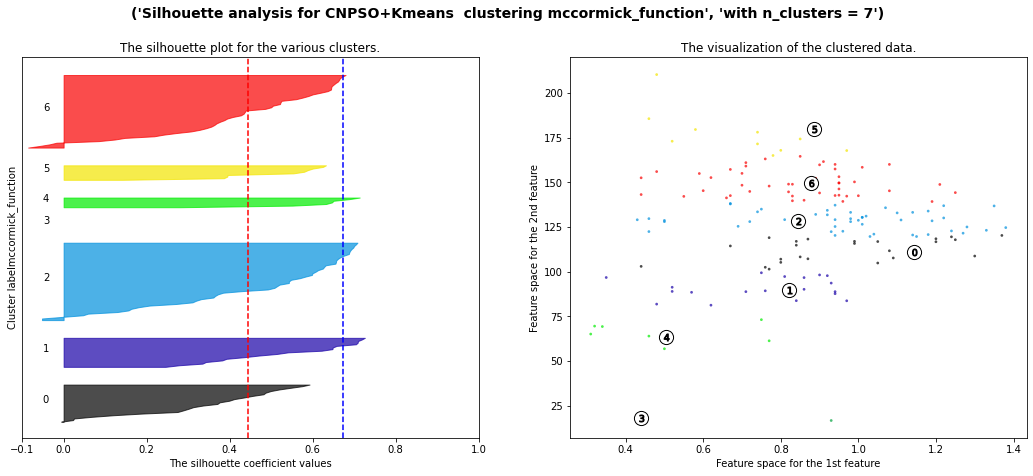

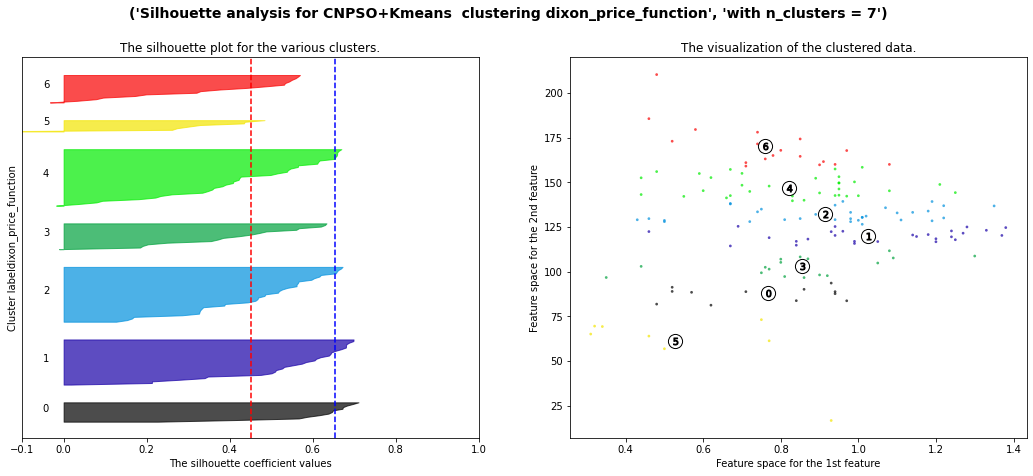

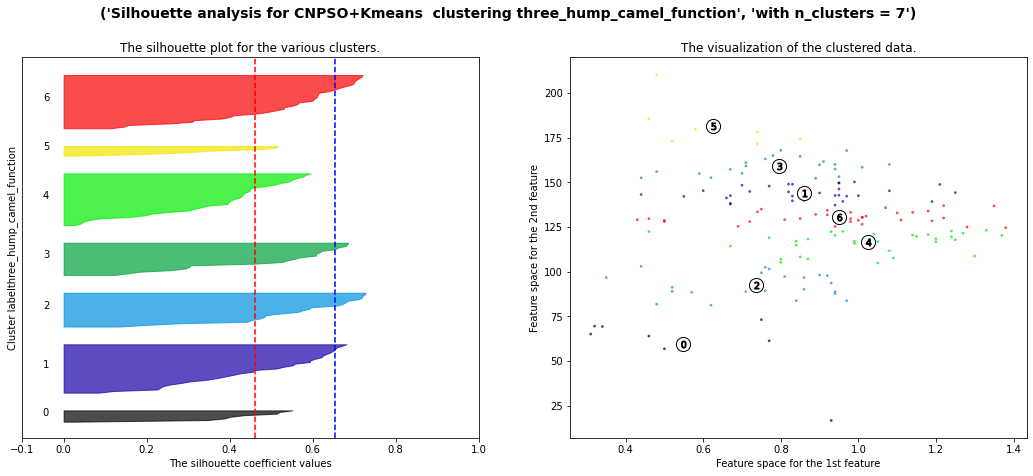

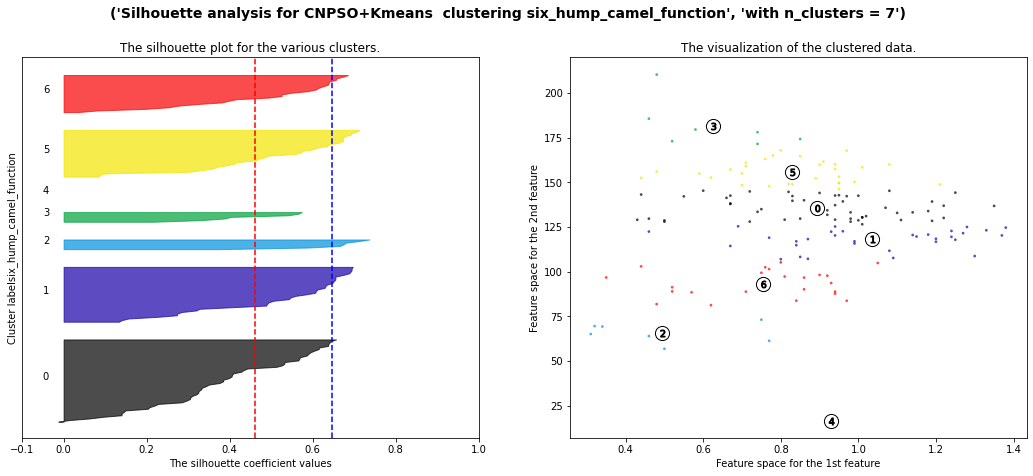

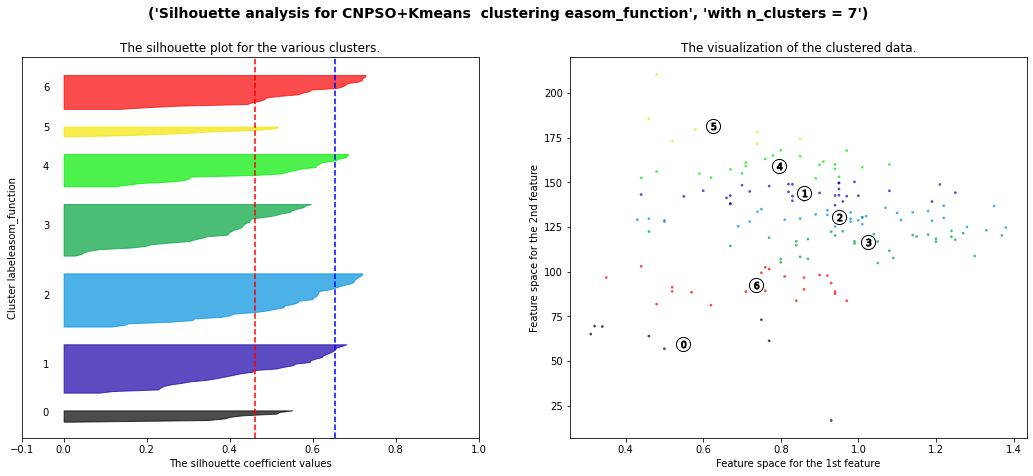

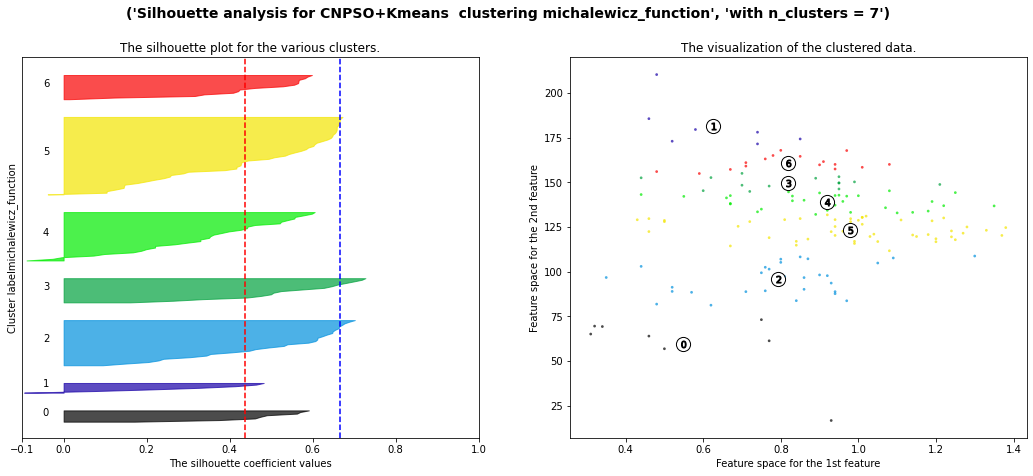

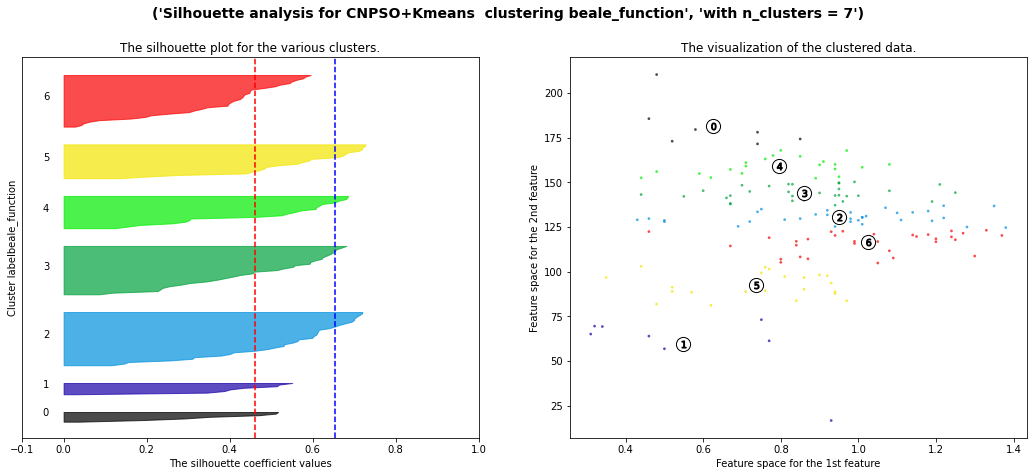

In [25]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
silhouette = []
range_n_clusters = [2, 3, 4, 5, 6,7]
X  = df_req[['Stride Length (m)', 'Cadence(steps/min)', 'Leg Length (m)',
       'Age(years)']].values
for n_clusters in range_n_clusters:
    for g in w:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = CNParticleSwarmOptimizedClustering(function=g,
        n_cluster=n_clusters, n_particles=10, data=X, hybrid=True, max_iter=200, print_debug=2000)
      clusterer.run()
      pso_kmeans = KMeans(n_cluster=n_clusters, init_pp=False, seed=2018)
      pso_kmeans.centroid = clusterer.gbest_centroids.copy()
      cluster_labels = pso_kmeans.predict(X)
      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      silhouette.append(silhouette_avg)
      print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg,
          'function',g.__name__)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label" + g.__name__)

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
      ax1.axvline(x=purity_score(labels,cluster_labels),color = 'blue',linestyle="--")
      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

      # Labeling the clusters
      centers = pso_kmeans.centroid
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for CNPSO+Kmeans  clustering " + g.__name__,
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [26]:
import plotly.graph_objects as go

x = [i.__name__ for i in w]
y = silhouette[:len(x)]
print('cluster 2')
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

cluster 2


In [27]:
import plotly.graph_objects as go

x = [i.__name__ for i in w]
y = silhouette[len(x):len(x)*2]
print('cluster 3')
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

cluster 3


In [28]:
import plotly.graph_objects as go

x = [i.__name__ for i in w]
y = silhouette[len(x)*2:len(x)*3]
print('cluster 4')
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

cluster 4


In [32]:
import plotly.graph_objects as go

x = [i.__name__ for i in w]
y = silhouette[len(x)*3:len(x)*4]
print('cluster 5')
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

cluster 5


In [30]:
import plotly.graph_objects as go

x = [i.__name__ for i in w]
y = silhouette[len(x)*4:len(x)*5]
print('cluster 6')
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

cluster 6


In [31]:
import plotly.graph_objects as go

x = [i.__name__ for i in w]
y = silhouette[len(x)*5:len(x)*6]
print('cluster 7')
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.show()

cluster 7
